# Rental Price Trends

Importing libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

import zipfile
import csv
import json
import os

import time

# Reading Dataset

In [2]:
data= pd.read_csv('rentfaster.csv')

In [3]:
pd.set_option('display.max_columns',None)  #to show all columns

In [4]:
df=data.copy()

In [ ]:
#data.info()

In [5]:
# Convert beds and baths to numerical values
data['sq_feet'] = data['sq_feet'].str.extract('(\d+)').astype(float)  # Extract numbers
data['beds'] = data['beds'].str.extract('(\d+)').astype(float)  # Extract numbers
data['baths'] = data['baths'].str.extract('(\d+)').astype(float)  # Extract numbers

In [ ]:
#data.info()

In [ ]:
# data.describe()

In [ ]:
#data.head()

In [6]:
data.isnull().sum()

,0
rentfaster_id,0
city,0
province,0
address,125
latitude,0
longitude,0
lease_term,46
type,0
price,0
beds,1795


In [7]:
# Calculate the mean excluding zeros
#mean = data.loc[data['sq_feet'] != 0, 'sq_feet'].mean()

# Replace zeros with the calculated mean
data['sq_feet'] = data['sq_feet'].replace(0, data.loc[data['sq_feet'] != 0, 'sq_feet'].mean())
data['sq_feet'] = data['sq_feet'].fillna(data.loc[data['sq_feet'] != 0, 'sq_feet'].mean())  # replace NaNs with 0

In [8]:
data['sq_feet'].isnull().sum()

np.int64(0)

In [9]:
#mean = data.loc[data['price'] != 0, 'price'].mean()
data['price']=data['price'].fillna(data.loc[data['price'] != 0, 'price'].mean())

In [10]:
#mean = data.loc[data['beds'] != 0, 'beds'].mean()
data['beds']=data['beds'].fillna(data.loc[data['beds'] != 0, 'beds'].mean())

In [11]:
data['baths']=data['baths'].fillna(data.loc[data['baths'] != 0, 'baths'].mean())

In [14]:
# Replace NaN in all categorical columns with 'Unknown'
for column in data.select_dtypes(include='object').columns:
    data[column].fillna('Unknown', inplace=True)

<ipython-input-14-192f76b4101a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna('Unknown', inplace=True)


In [15]:
data.describe()

,rentfaster_id,latitude,longitude,price,beds,baths,sq_feet
count,25771.000000,25771.000000,25771.000000,25771.000000,25771.000000,25771.000000,25771.000000
mean,471913.795274,48.903370,-100.332196,2151.624142,1.863989,1.352222,915.102538
std,120330.335865,3.603257,17.917001,972.820941,0.857786,0.574549,442.003621
min,820.000000,40.741802,-128.661880,0.000000,1.000000,0.000000,1.000000
25%,415749.000000,45.418785,-114.074660,1600.000000,1.000000,1.000000,660.000000
50%,522379.000000,50.913739,-113.513905,2045.000000,2.000000,1.000000,900.000000
75%,563397.500000,51.093585,-79.401311,2550.000000,2.000000,2.000000,977.000000
max,572635.000000,62.459246,-52.695472,29990.000000,9.000000,8.000000,11700.000000


In [16]:
for col in data.columns:
    print(col, ":",data[col].nunique())

rentfaster_id : 9614
city : 269
province : 10
address : 8003
latitude : 8961
longitude : 8964
lease_term : 7
type : 15
price : 2749
beds : 10
baths : 10
sq_feet : 1619
link : 9615
furnishing : 4
availability_date : 133
smoking : 5
cats : 3
dogs : 3


In [18]:
#data.columns

In [87]:
preprocessed_data= data.to_csv('preprocessed_data.csv')

In [89]:
from google.colab import files
files.download('preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Rental Price Trends

## geospatial distribution

In [19]:
!pip install geopandas
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 74.8 MB/s eta 0:00:00


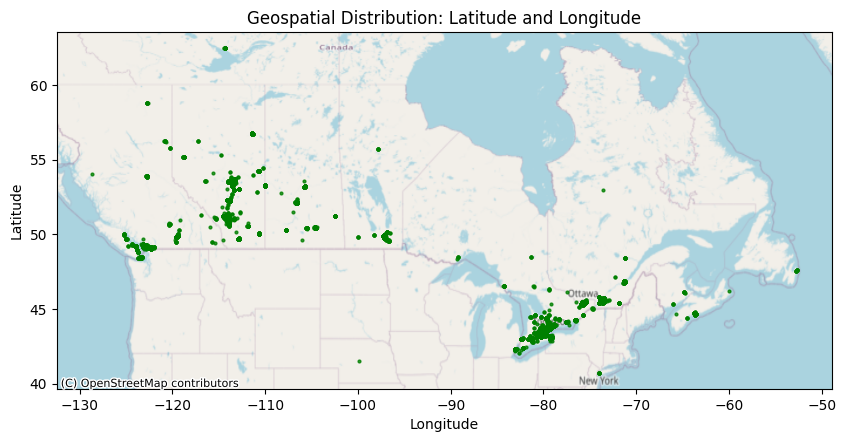

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx # for basemaps

# GeoDataFrame
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")  # EPSG:4326 for latitude/longitude

# Step 2: Plot points on a map
fig, ax = plt.subplots(figsize=(10, 12))
geo_data.plot(ax=ax, color='green', alpha=0.8, markersize=4)

# Step 3: Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=geo_data.crs.to_string())

# Step 4: Enhance the plot
ax.set_title('Geospatial Distribution: Latitude and Longitude')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('geospatial_distribution.png')
plt.show()


In [ ]:
#data.type.value_counts()

In [ ]:
# pd.to_numeric
#data['sq_feet'] = pd.to_numeric(data['sq_feet'], errors='coerce')

In [21]:
data['sq_feet'].value_counts()

,count
sq_feet,
915.102538,4117
915.102538,657
1000.000000,396
600.000000,376
900.000000,366
...,...
1742.000000,1
2108.000000,1
1824.000000,1


## Average Price Per Square Foot by City in British Columbia

Adding a new feature called average Price Per Square Foot to data

<ipython-input-58-e94008a3a814>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_data['price_per_sqft'] = bc_data['price'] / bc_data['sq_feet']


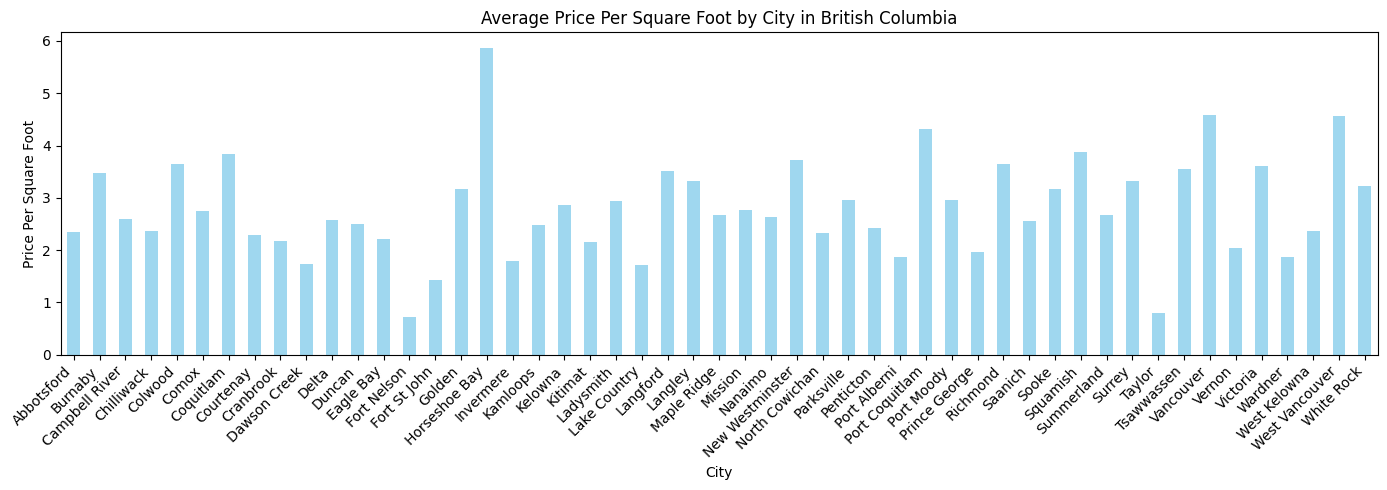

In [58]:
import matplotlib.pyplot as plt

# Filter data for British Columbia cities
bc_data = data[data['province'] == 'British Columbia']

# Calculate price per square foot
bc_data['price_per_sqft'] = bc_data['price'] / bc_data['sq_feet']

# Aggregate the data by city and calculate mean price per square foot
city_data = bc_data.groupby('city')['price_per_sqft'].mean()

city_data.to_csv('Ave_Price_Per_Sq_Foot_by_City_in_BC.csv', index=False)
city_data.to_json('Ave_Price_Per_Sq_Foot_by_City_in_BC.json')
#os.remove('city_data.csv')

# Plot
plt.figure(figsize=(14, 5))
city_data.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("Average Price Per Square Foot by City in British Columbia")
plt.xlabel("City")
plt.ylabel("Price Per Square Foot")
plt.xticks(rotation=45, ha='right')  # Rotate city labels
plt.tight_layout()
plt.savefig('Ave_Price_Per_Sq_Foot_by_City_in_BC.png')
#os.remove('Ave_Price_Per_Sq_Foot_by_City_in_BC.png')
plt.show()

In [23]:
print(bc_data['price_per_sqft'])

8853     2.184455
8854     1.911261
8855     1.692706
8856     2.722222
8857     2.116788
           ...   
14926    4.405440
14927    3.655625
14928    4.749000
14929    3.406504
14930    3.052231
Name: price_per_sqft, Length: 1154, dtype: float64


In [ ]:
# # Fill missing numerical values with mean
# data['sq_feet']=data['sq_feet'].fillna(data['sq_feet'].mean())
# #data['price_per_sqft']=data['price_per_sqft'].fillna(data['price_per_sqft'].mean())
# data['price']=data['price'].fillna(data['price'].mean())
# data['beds']=data['beds'].fillna(data['beds'].mean())
# data['baths']=data['baths'].fillna(data['baths'].mean())

# # Fill missing categorical values with 'Unknown'
# data.fillna({col: 'type'}, inplace=True)


## Data by City in each province


In [ ]:
#data['province'].value_counts()

In [ ]:
# data['province'].value_counts().to_csv('Rent_trends_by_City_in_each_Province.csv', index=False)

## Rent_trends_by_City_in_each_Province

In [60]:
Rent_trends_by_City_in_each_Province = data.groupby(['province', 'city']).size().reset_index(name='count')
Rent_trends_by_City_in_each_Province.to_csv('Rent_trends_by_City_in_each_Province.csv', index=False)
Rent_trends_by_City_in_each_Province.to_json('Rent_trends_by_City_in_each_Province.json')
print(Rent_trends_by_City_in_each_Province)

         province           city  count
0         Alberta        Airdrie    134
1         Alberta      Aldersyde      3
2         Alberta         Balzac      2
3         Alberta          Banff      1
4         Alberta       Beaumont     14
..            ...            ...    ...
264  Saskatchewan         Regina    228
265  Saskatchewan      Saskatoon    334
266  Saskatchewan  Swift Current     25
267  Saskatchewan         Warman      3
268  Saskatchewan        Yorkton     43

[269 rows x 3 columns]


## Average Price Per Sqft by City for all provinces.zip


/usr/lib/python3.11/zipfile.py:1567: UserWarning: Duplicate name: 'Average Price Per Square Foot by City in Alberta.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.11/zipfile.py:1567: UserWarning: Duplicate name: 'Average Price Per Square Foot by City in British Columbia.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.11/zipfile.py:1567: UserWarning: Duplicate name: 'Average Price Per Square Foot by City in Manitoba.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.11/zipfile.py:1567: UserWarning: Duplicate name: 'Average Price Per Square Foot by City in New Brunswick.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.11/zipfile.py:1567: UserWarning: Duplicate name: 'Average Price Per Square Foot by City in Newfoundland and Labrador.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.11/zipfile.py:1567: UserWarning: D

All CSV and Json files have been zipped into Average_price_per_sqft_by_city_for_all_provinces_data.zip


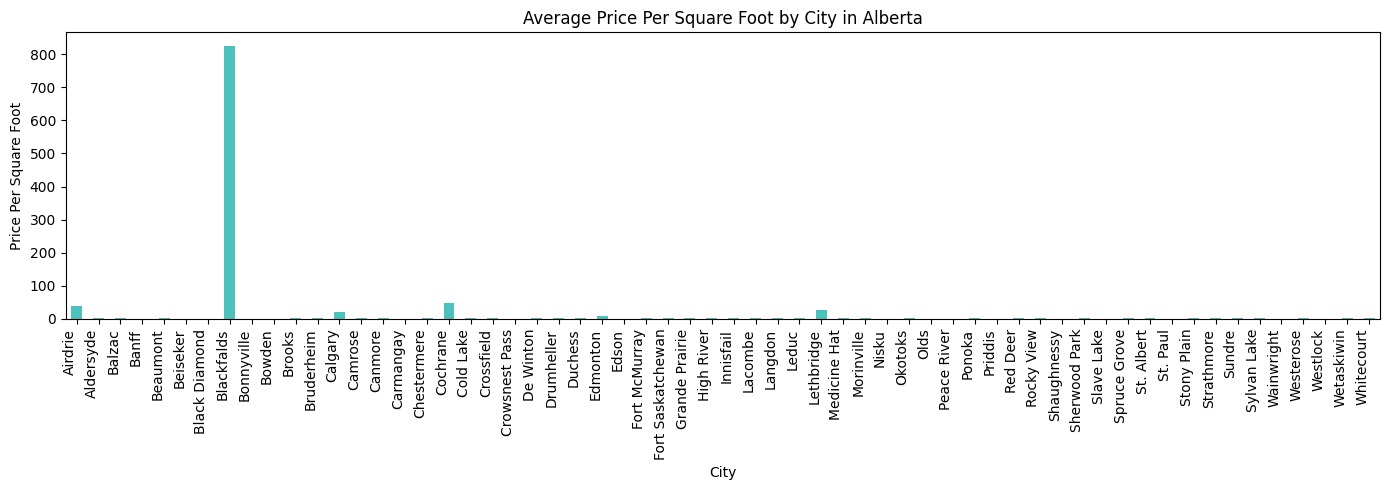

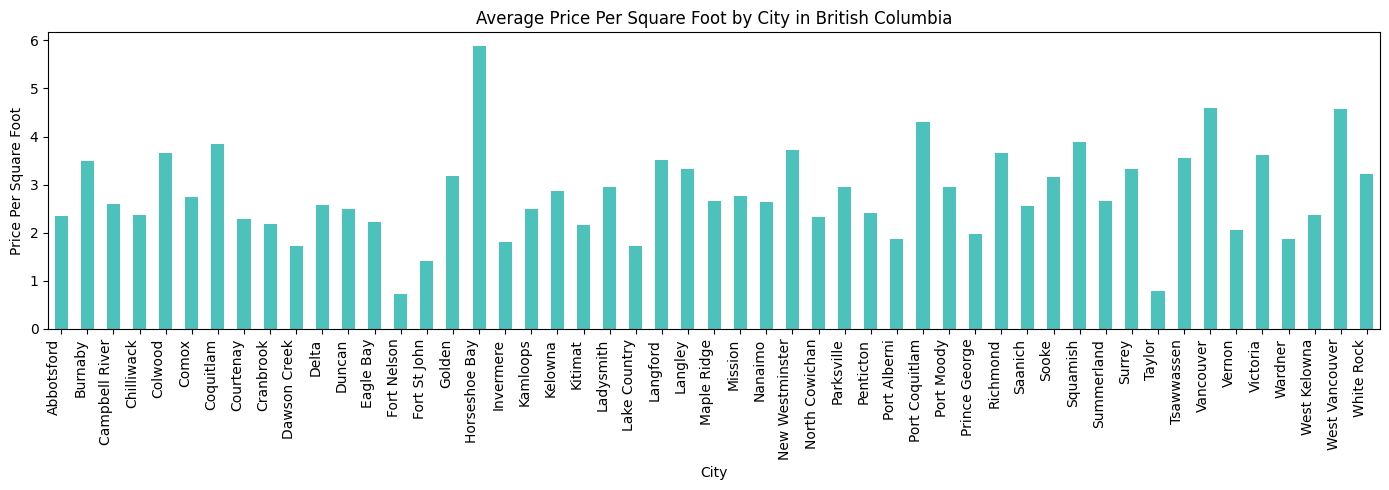

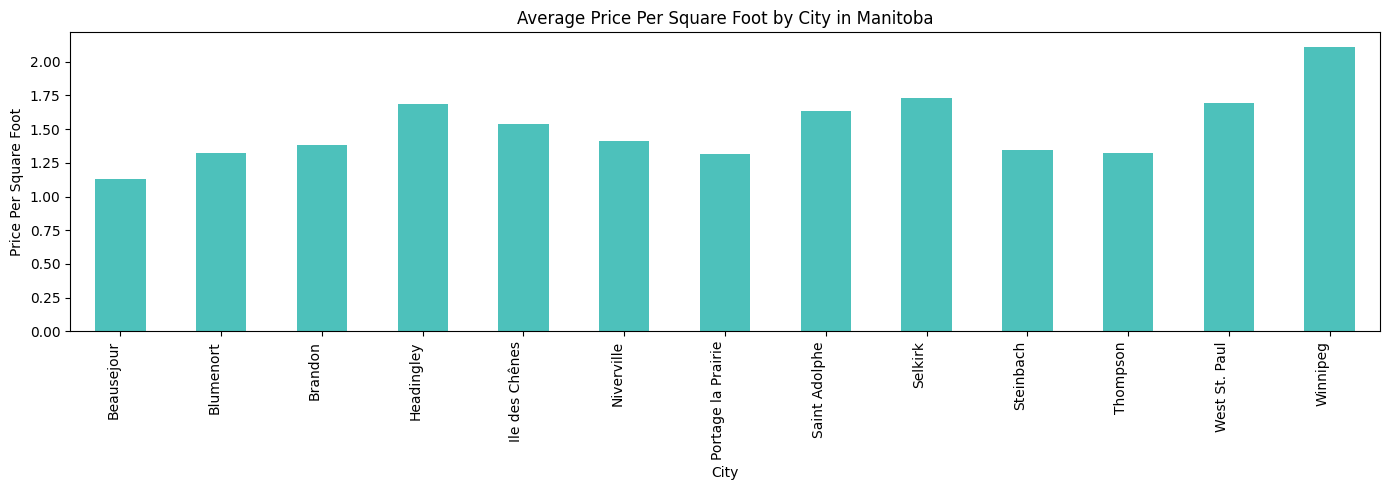

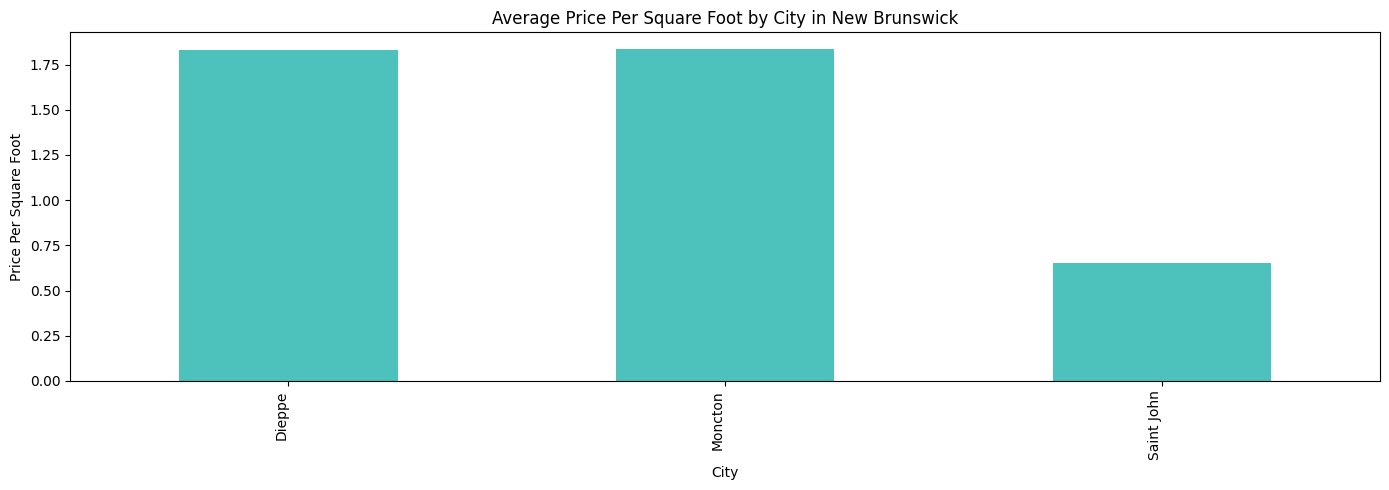

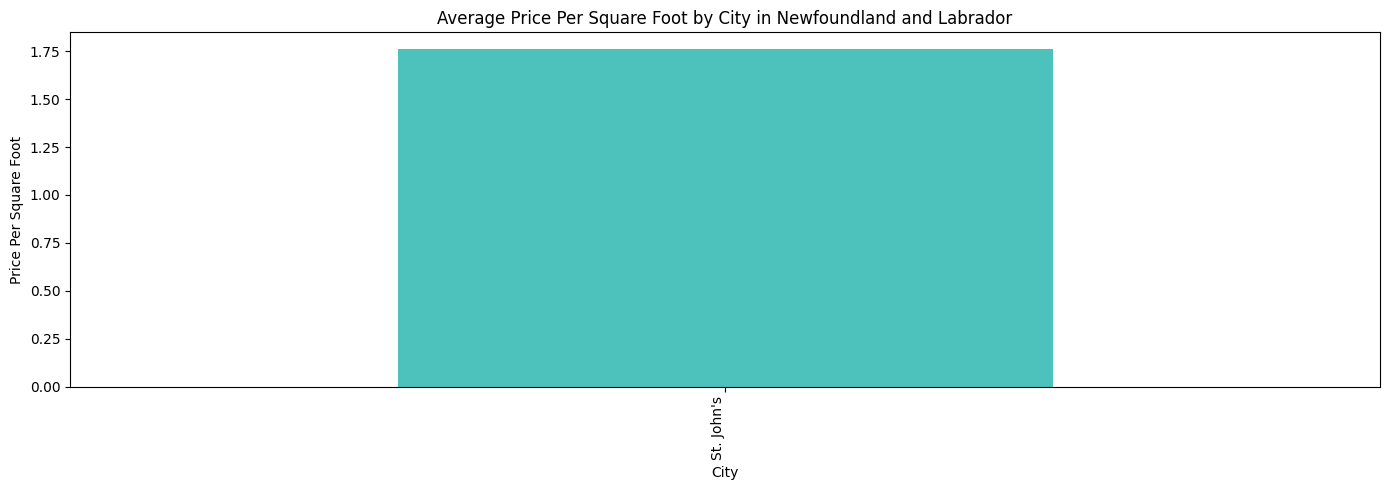

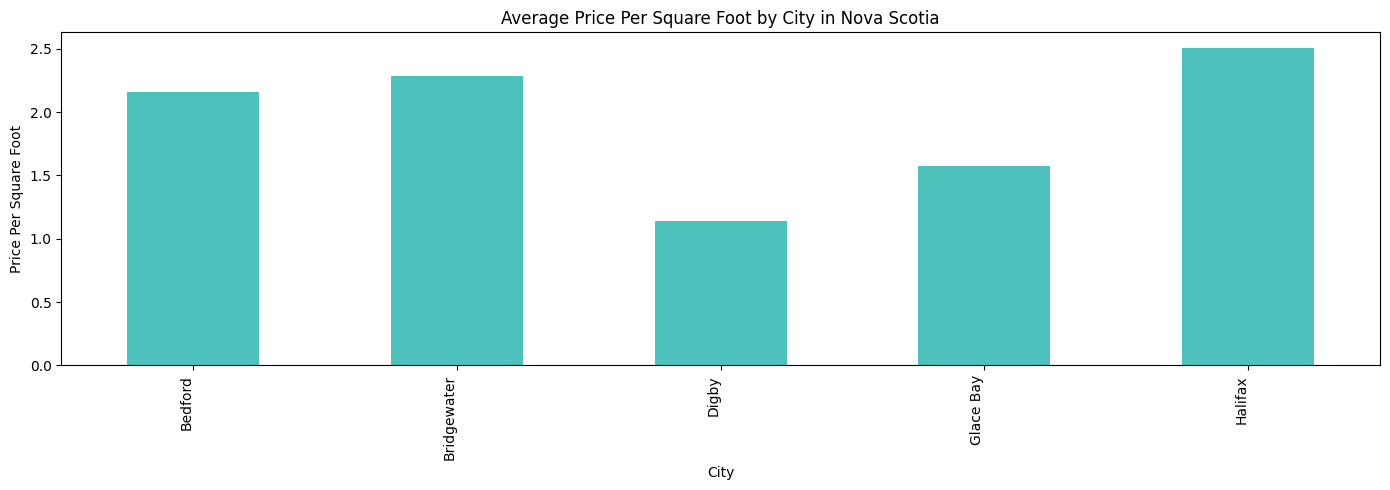

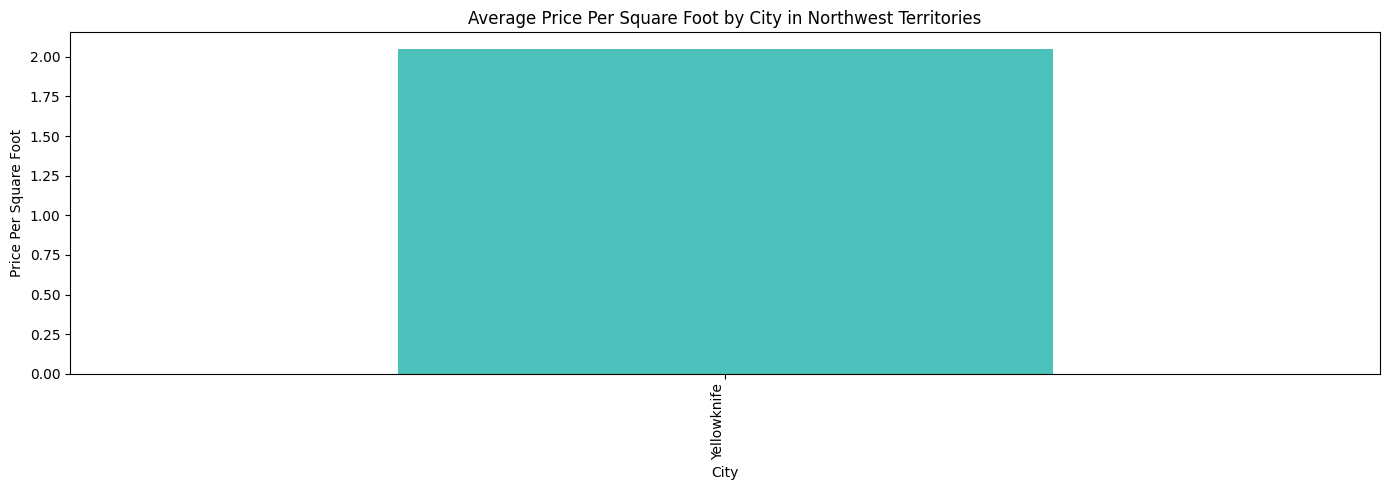

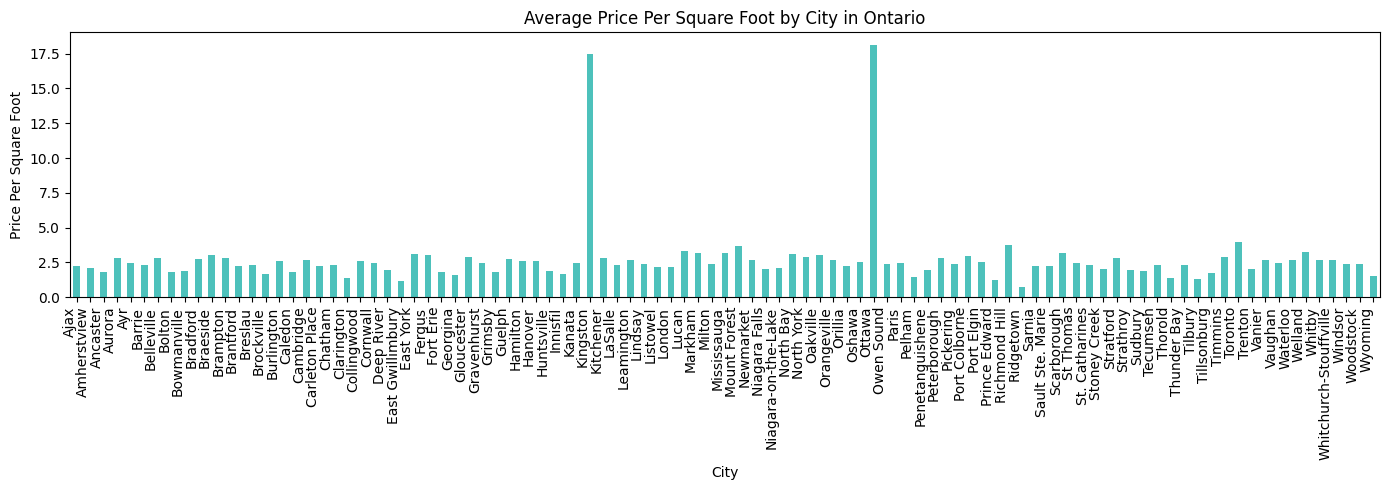

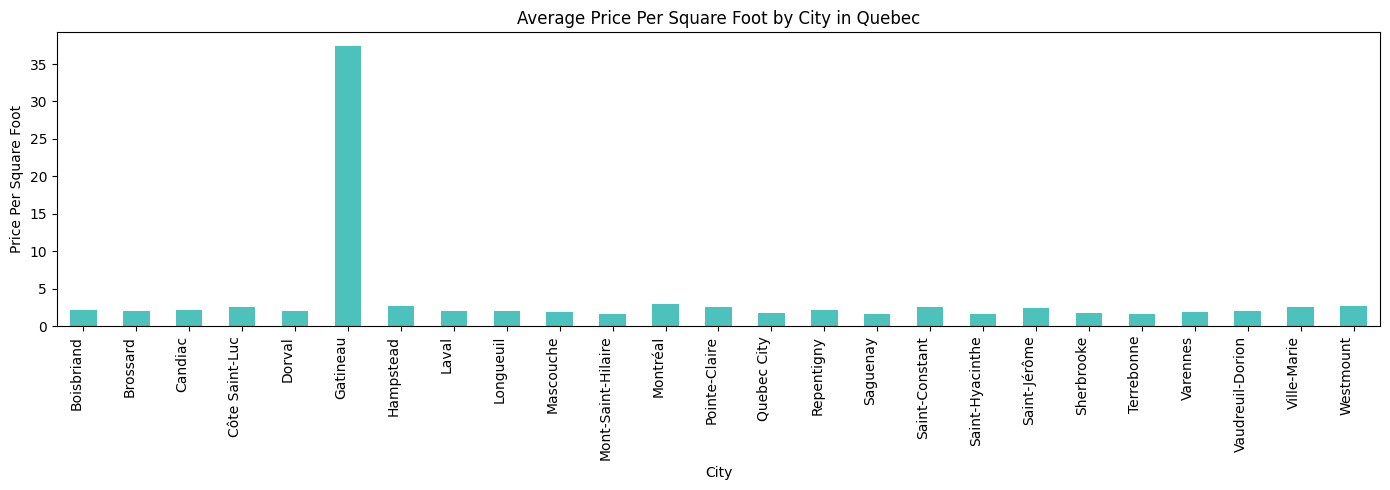

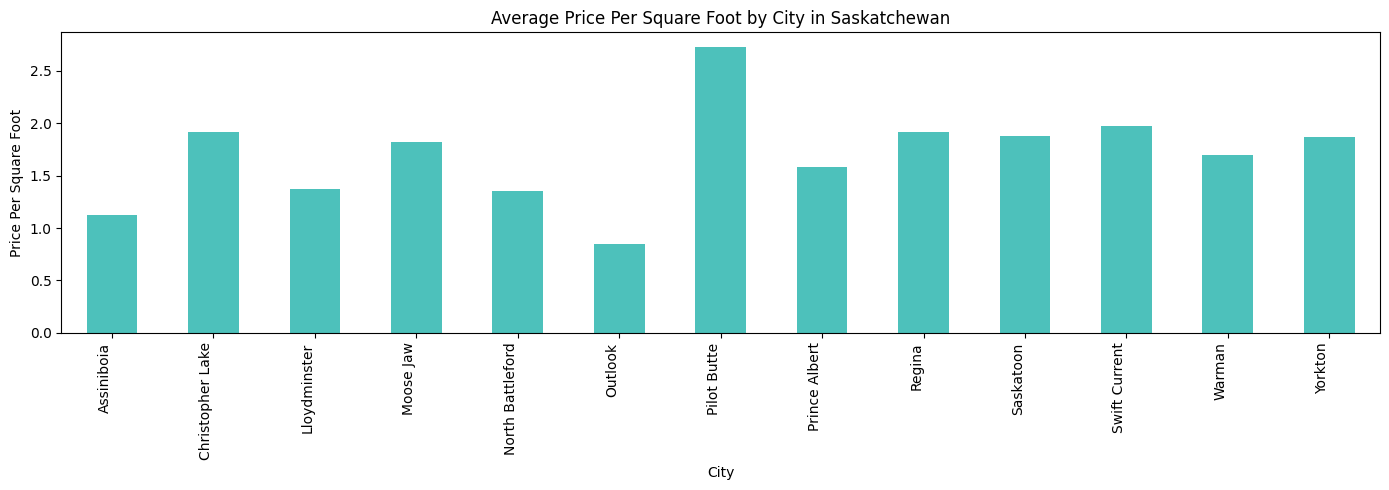

In [61]:
import matplotlib.pyplot as plt

# Calculate price per square foot
data['price_per_sqft'] = data['price'] / data['sq_feet']

import zipfile
import json
import os

# Creating a ZIP file to store all CSV files
zip_filename = "Average_price_per_sqft_by_city_for_all_provinces_data.zip"

with zipfile.ZipFile(zip_filename, 'w') as zipf:

  # Get unique provinces
  provinces = data['province'].unique()

  # Iterate over each province
  for province in provinces:
      # Filter data for the current province
      province_data = data[data['province'] == province]

      # Aggregate the data by city and calculate mean price per square foot
      city_data = province_data.groupby('city')['price_per_sqft'].mean()

      # Create a new figure for each province
      plt.figure(figsize=(14, 5))# This ensures a completely fresh figure for each iteration
      city_data.plot(kind='bar', color='lightseagreen', alpha=0.8)

      # Add titles and labels
      plt.title(f"Average Price Per Square Foot by City in {province}")
      plt.xlabel("City")
      plt.ylabel("Price Per Square Foot")
      plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability

      # Save pivot table as a CSV
      csv_filename = f"Average Price Per Square Foot by City in {province}.csv"
      province_data.to_csv(csv_filename)

      json_filename = f"Average Price Per Square Foot by City in {province}.json"
      province_data.to_json(json_filename)

      # Add the CSV file to the ZIP
      zipf.write(csv_filename)
      zipf.write(json_filename)

      #Add Json file to the Zip
      zipf.write(f"Average Price Per Square Foot by City in {province}.json")


      # Adjust layout
      plt.tight_layout()

      # Show the plot for the current province
      plt.savefig(f'Average_Price_Per_Sq_Foot_by_City_in_{province}.png')
      zipf.write(f'Average_Price_Per_Sq_Foot_by_City_in_{province}.png')
      # os.remove(f'Average_Price_Per_Sq_Foot_by_City_in_{province}.png')
      # os.remove(csv_filename)
      # os.remove(f"Average Price Per Square Foot by City in {province}.json")

      # plt.show()

print(f"All CSV and Json files have been zipped into {zip_filename}")

## heatmap_data.zip

Saved Alberta_heatmap_data.csv


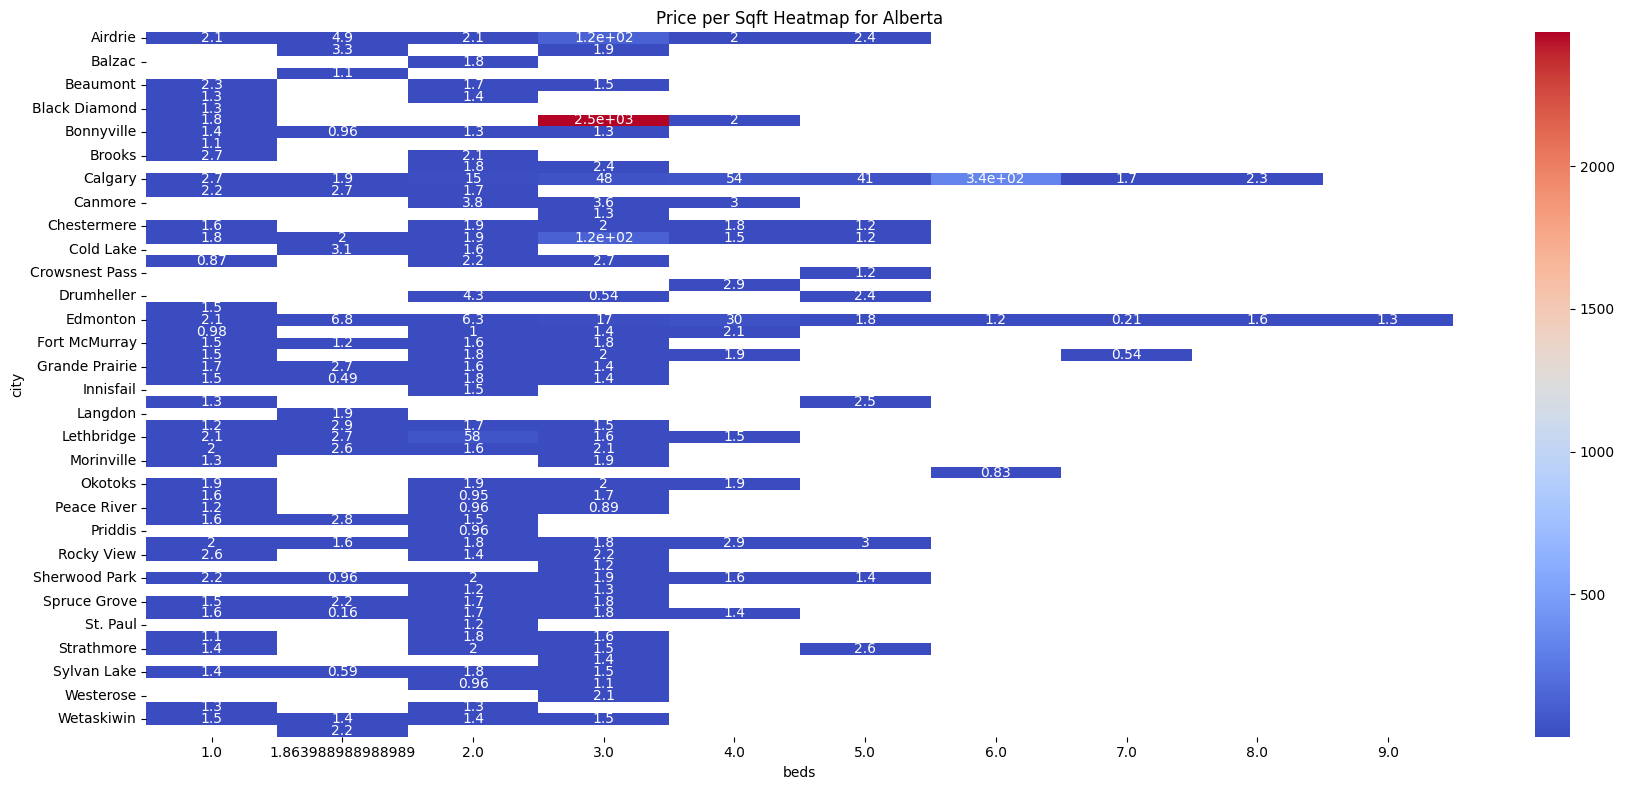

Saved British Columbia_heatmap_data.csv


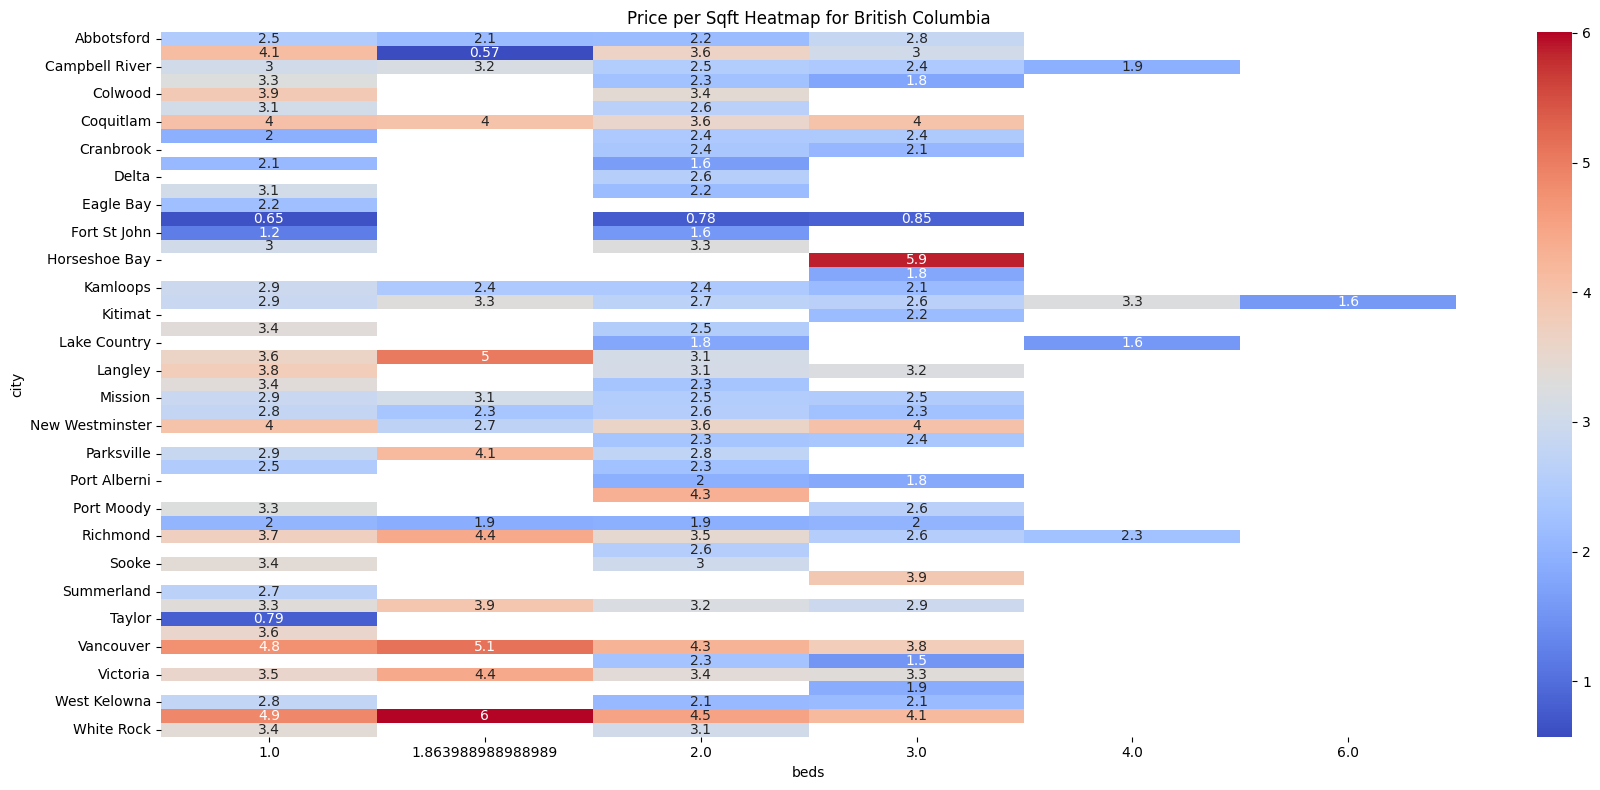

Saved Manitoba_heatmap_data.csv


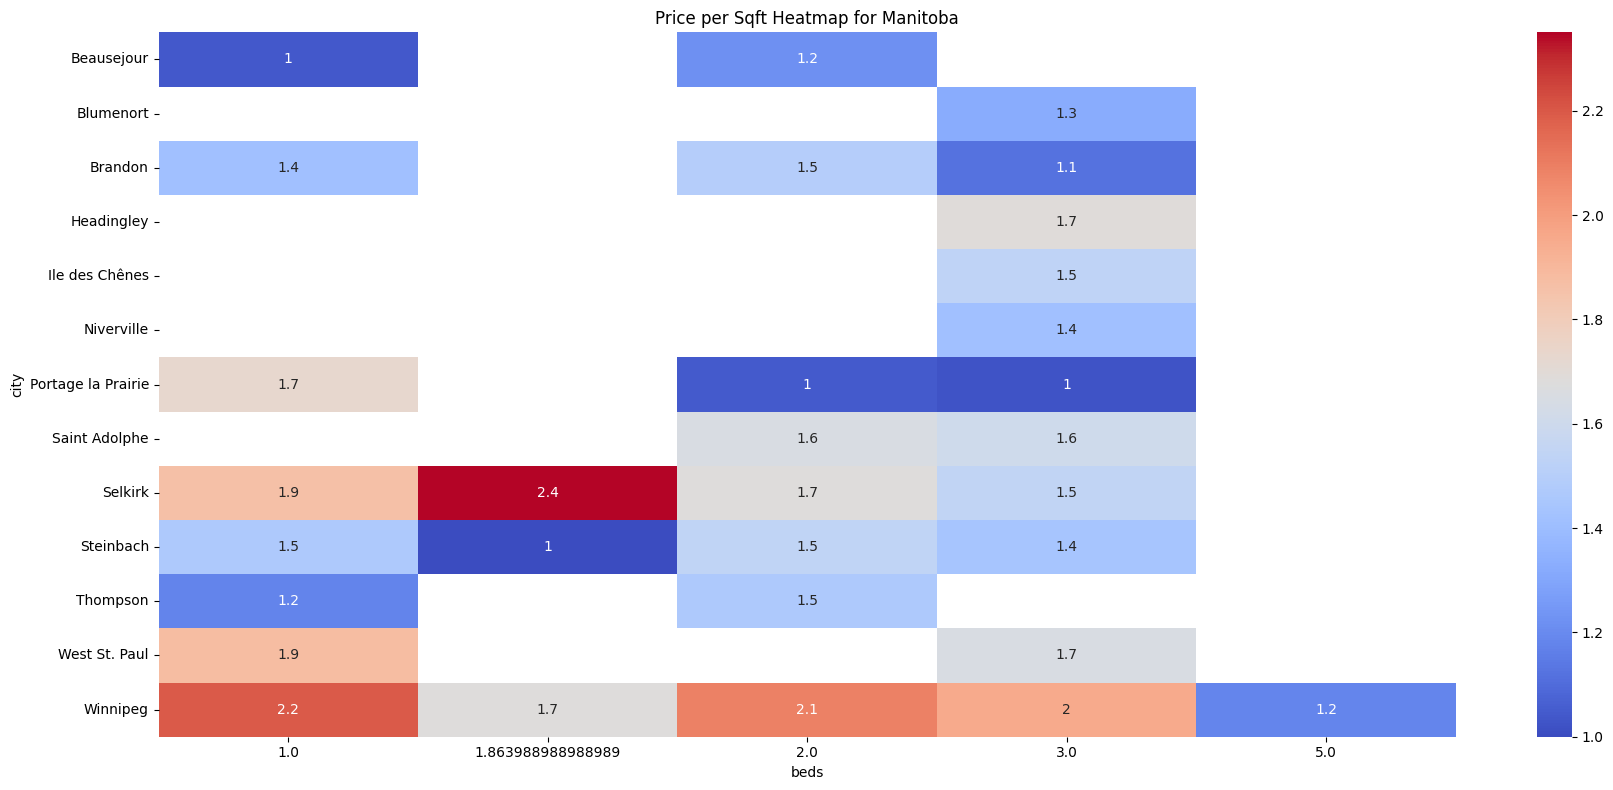

Saved New Brunswick_heatmap_data.csv


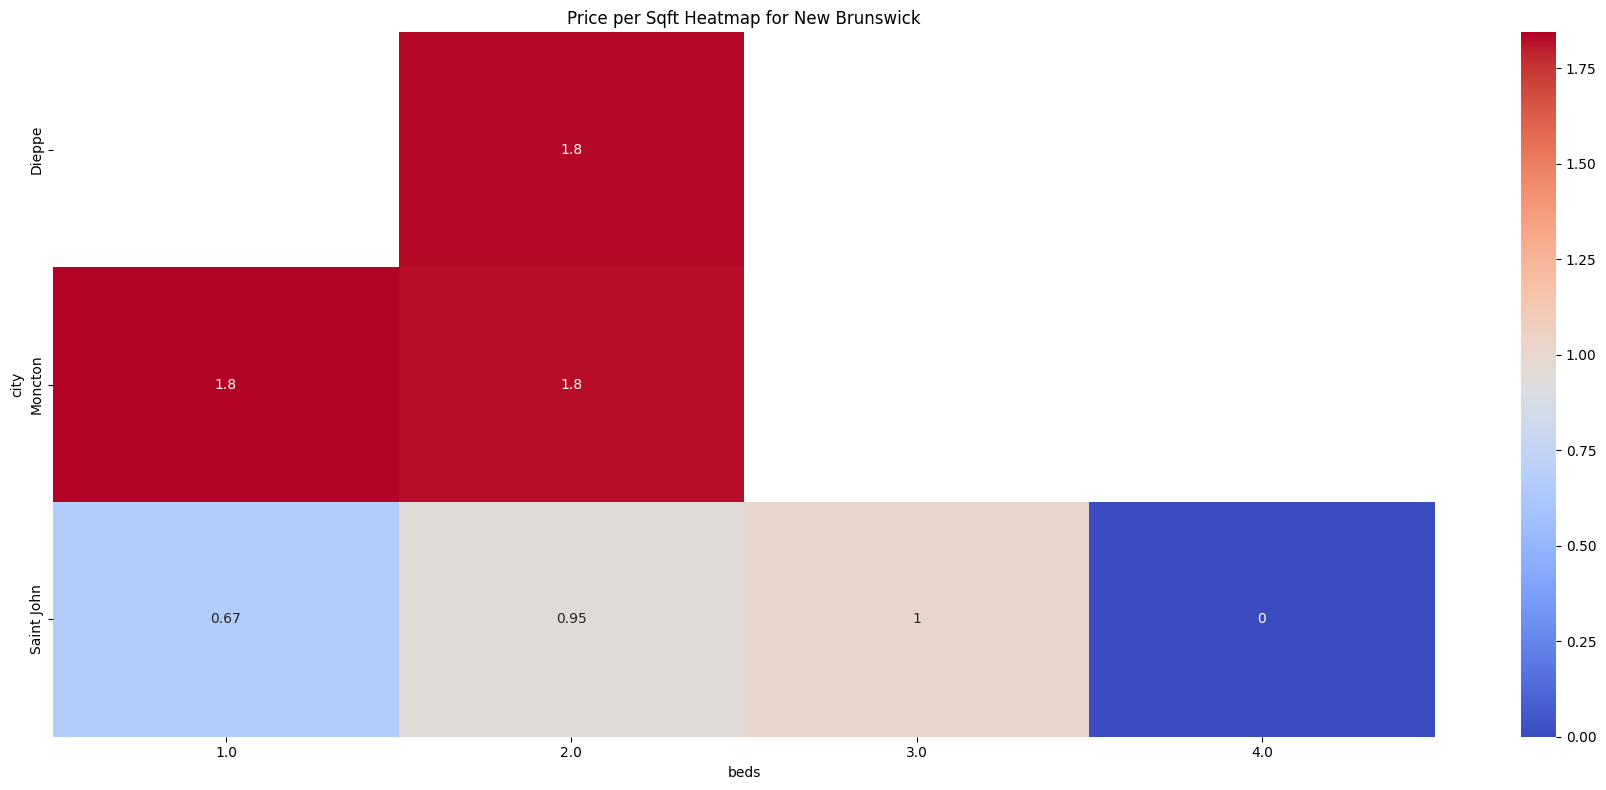

Saved Newfoundland and Labrador_heatmap_data.csv


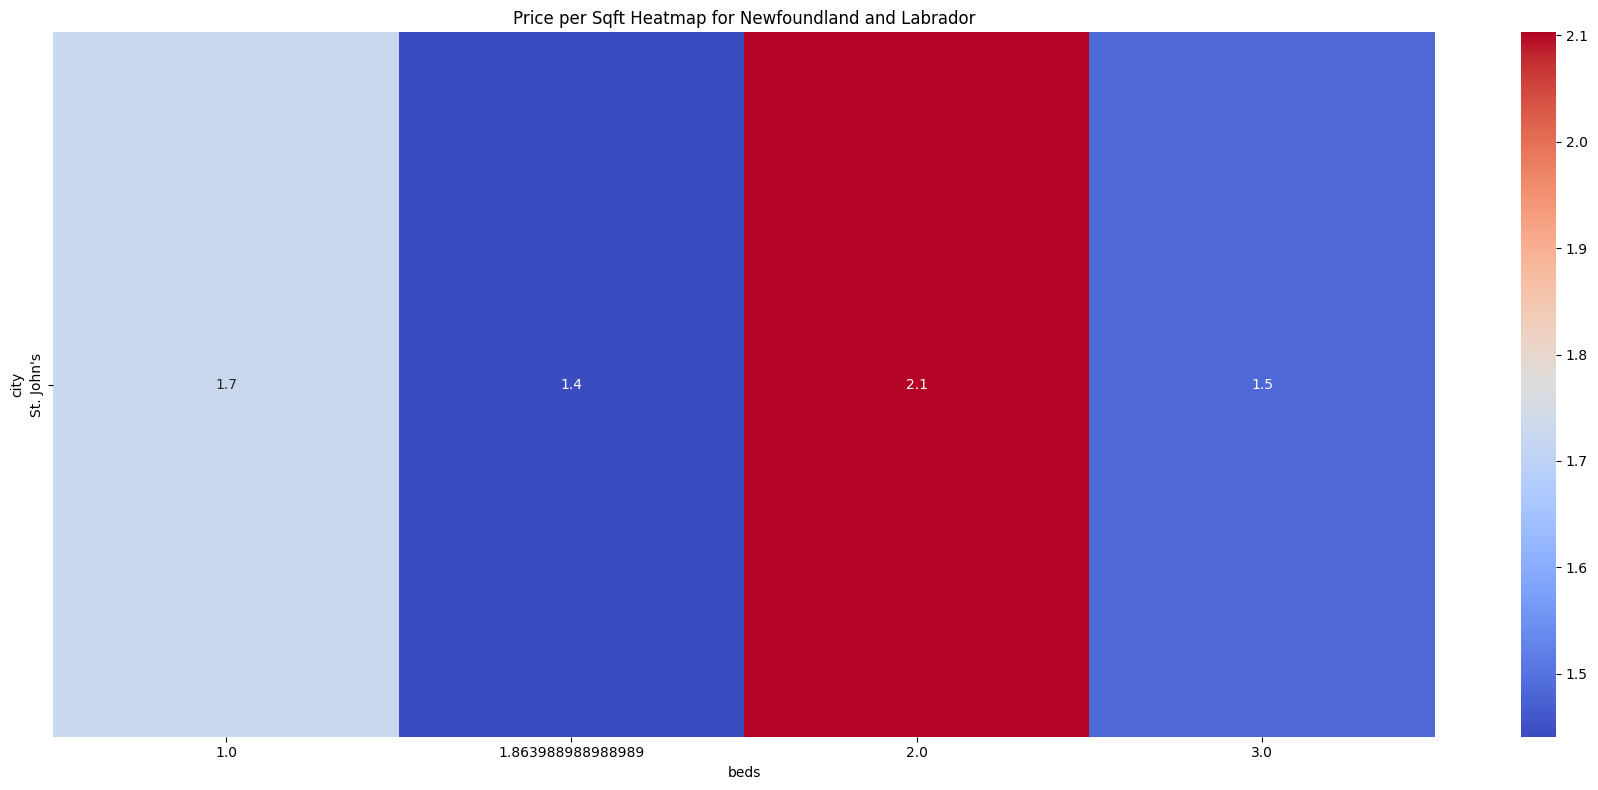

Saved Nova Scotia_heatmap_data.csv


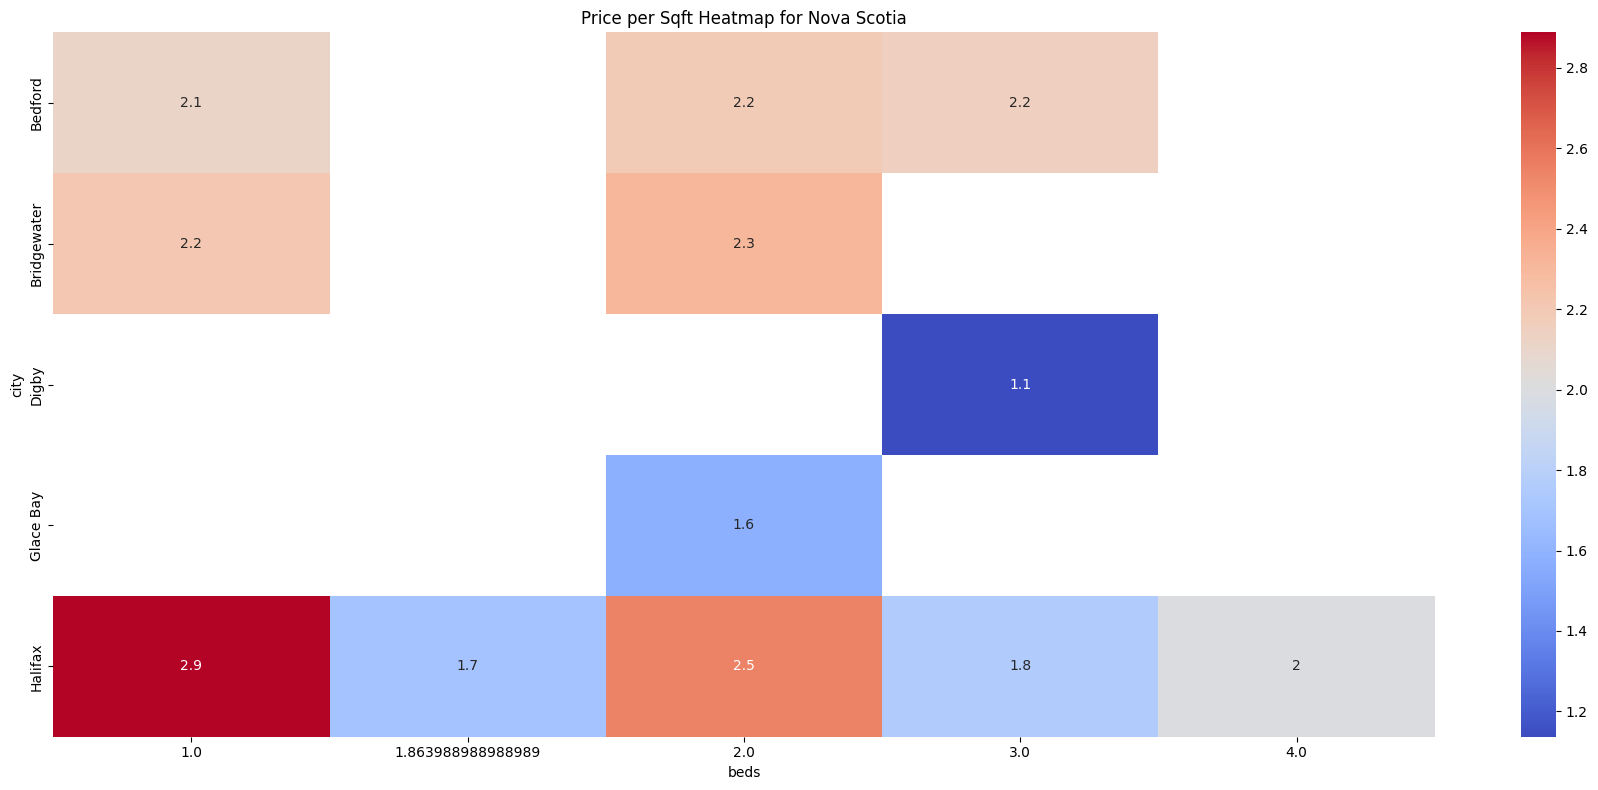

Saved Northwest Territories_heatmap_data.csv


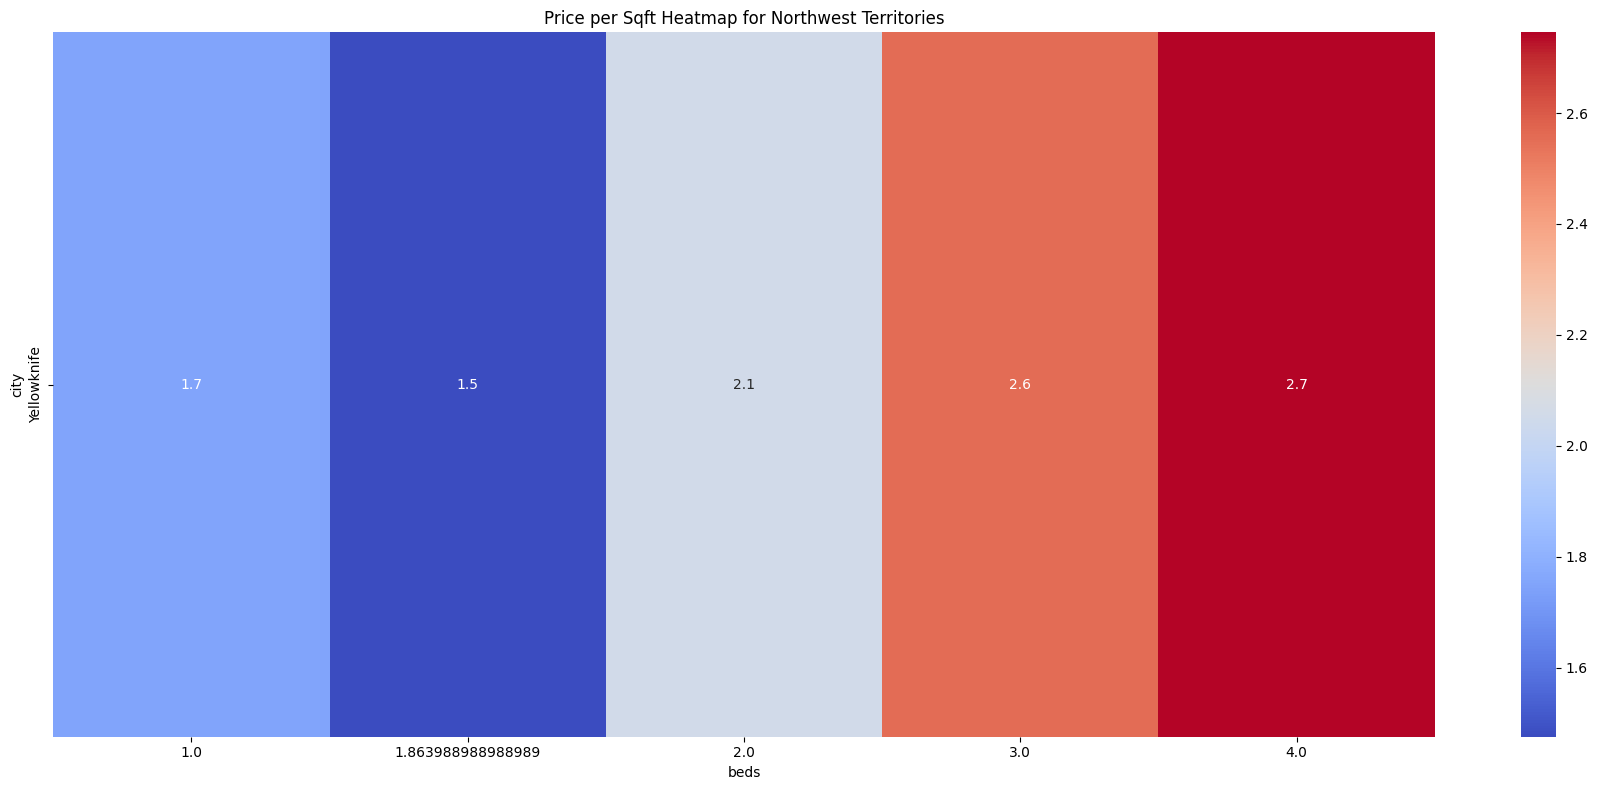

Saved Ontario_heatmap_data.csv


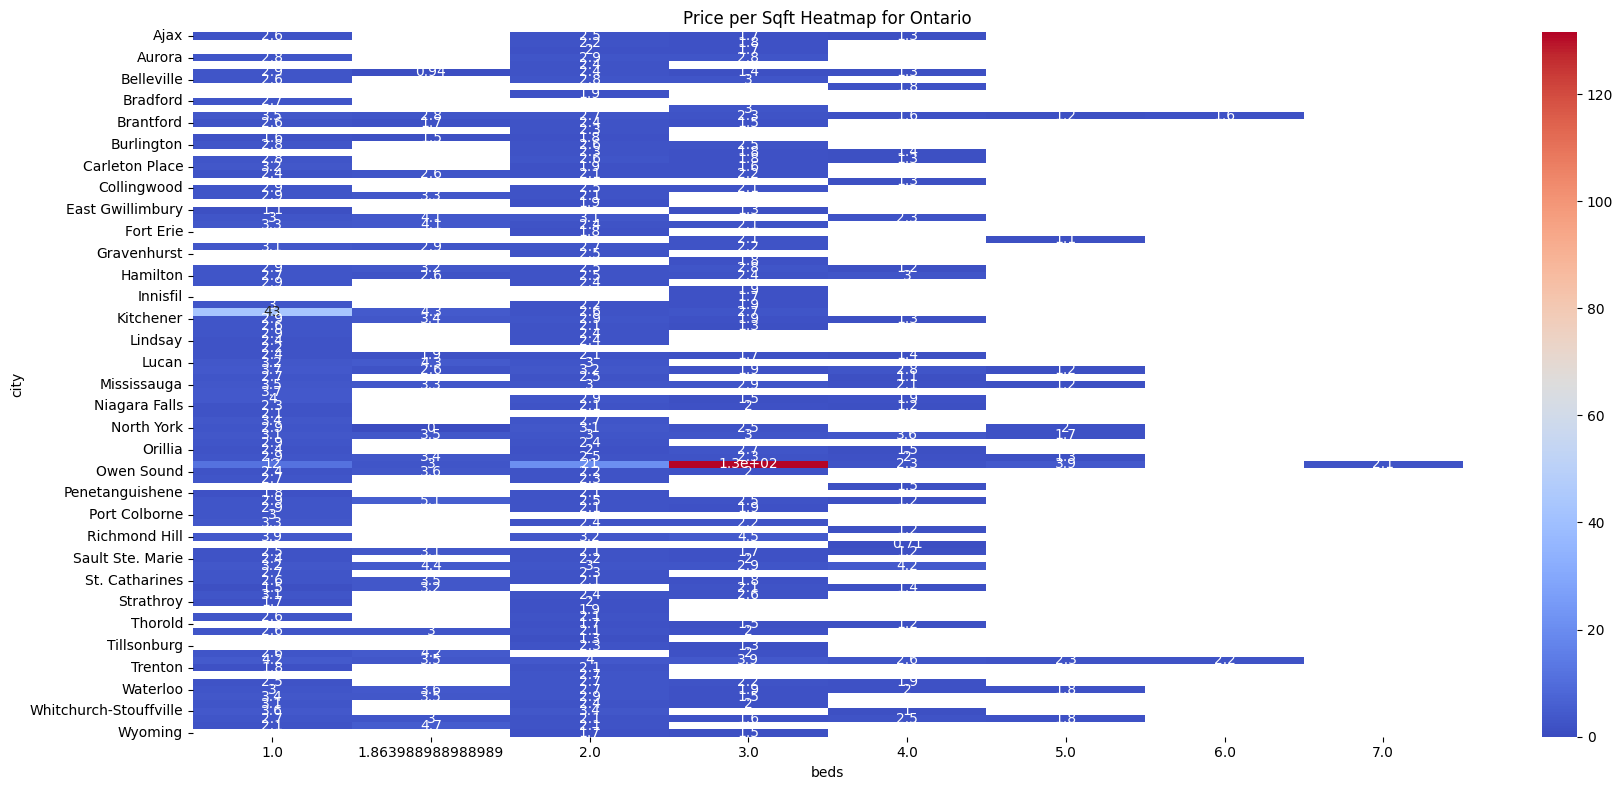

Saved Quebec_heatmap_data.csv


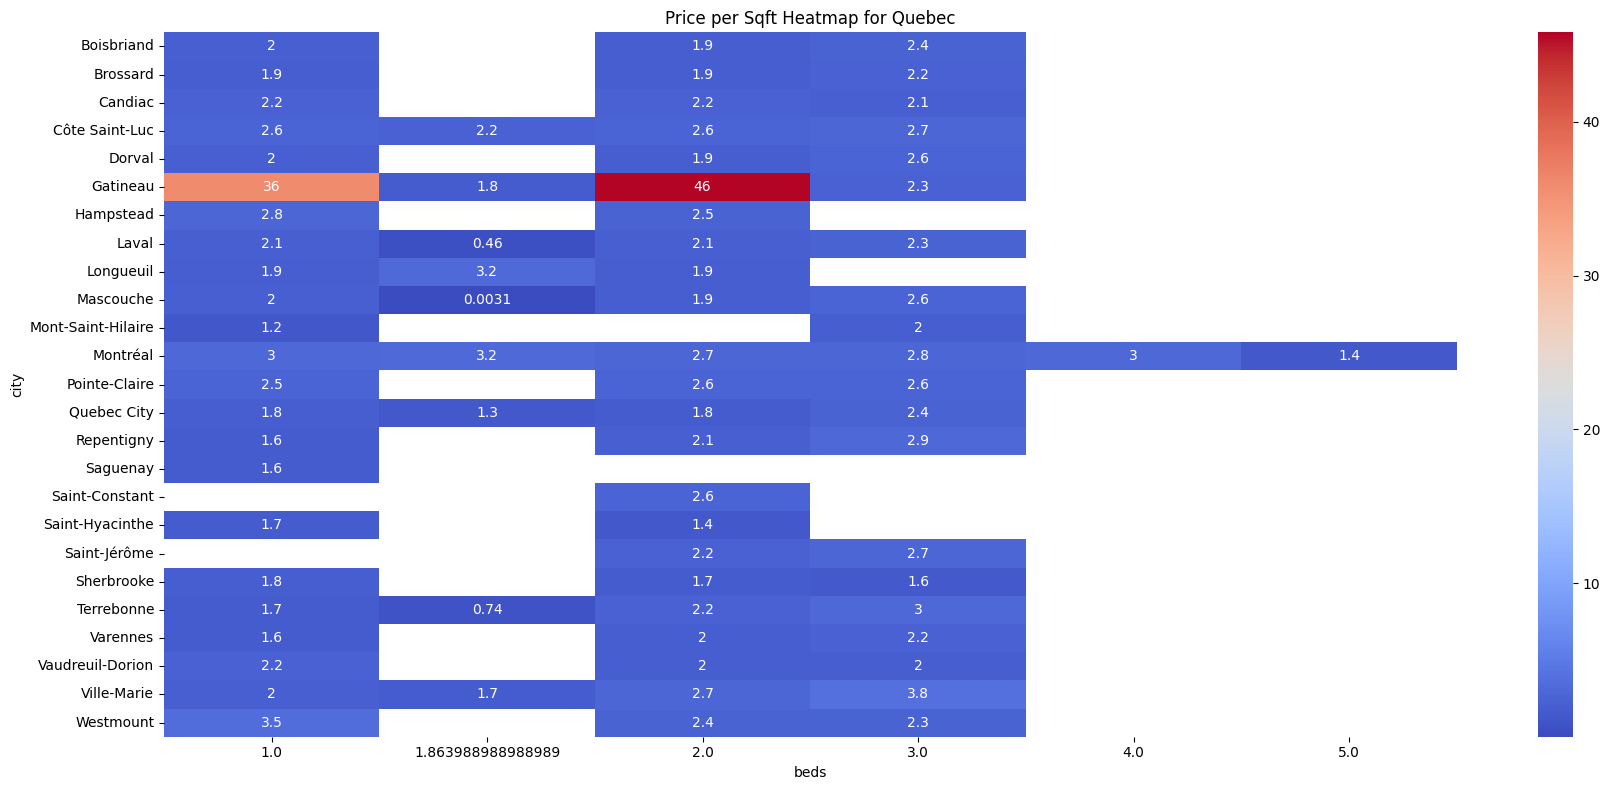

Saved Saskatchewan_heatmap_data.csv


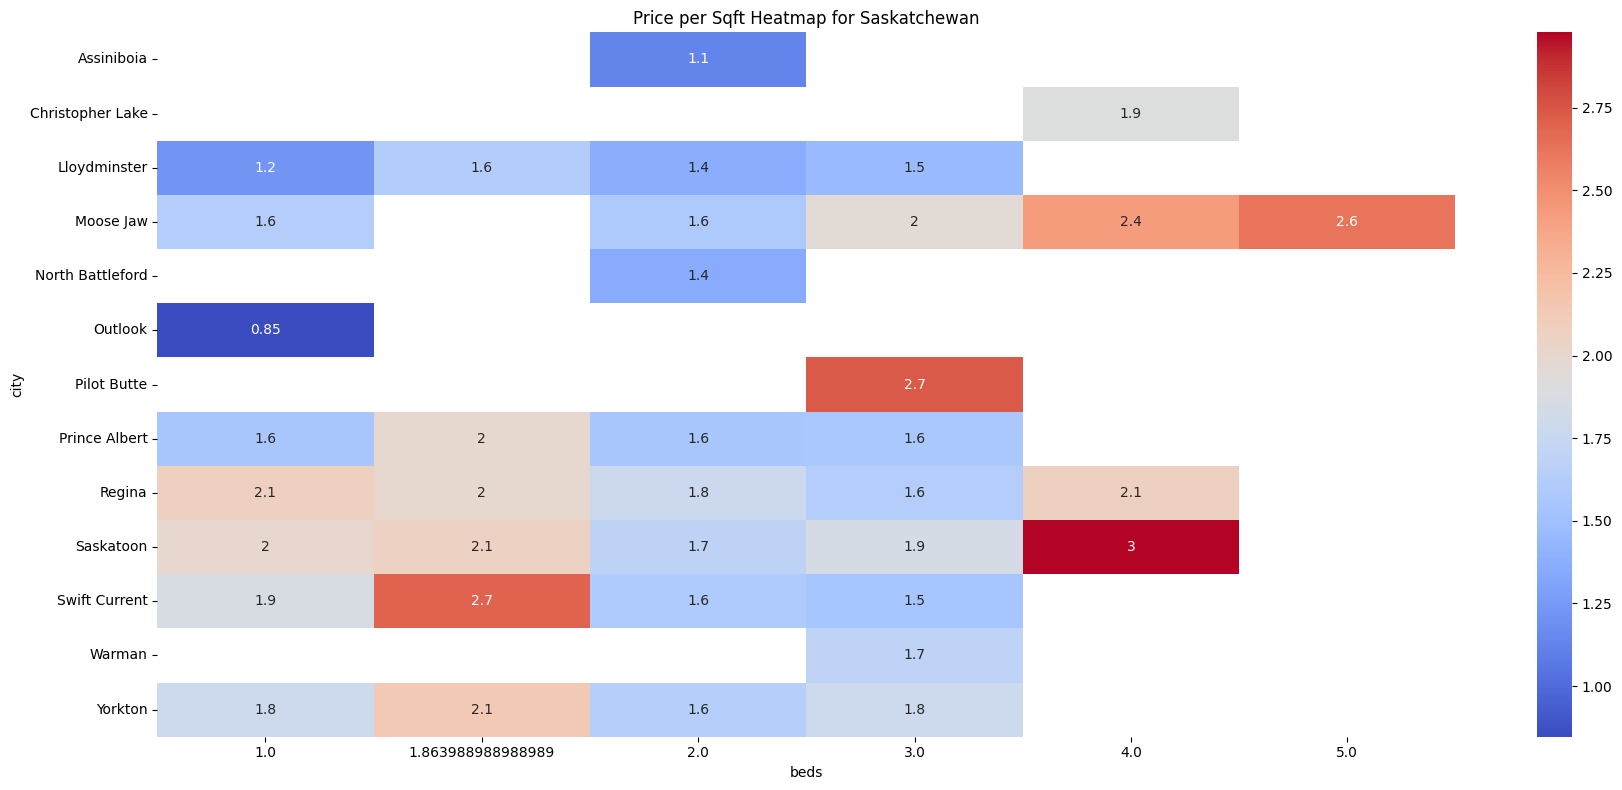

All CSV files have been zipped into heatmap_data.zip


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

# Create a ZIP file to store all CSV files
zip_filename = "heatmap_data.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Get the list of unique provinces
    provinces = data['province'].unique()

    # Loop through each province
    for province in provinces:
        # Filter the data for the current province
        province_data = data[data['province'] == province]

        # Create a pivot table
        pivot_table = province_data.pivot_table(
            values='price_per_sqft',
            index='city',  # Use 'city' as rows
            columns='beds',  # Use 'beds' or another column for columns
            aggfunc='mean'
        )

        # Save pivot table as a CSV
        csv_filename = f"{province}_heatmap_data.csv"
        pivot_table.to_csv(csv_filename)
        print(f"Saved {csv_filename}")

        # Add the CSV file to the ZIP
        zipf.write(csv_filename)

        # save as Json
        pd.read_csv(csv_filename).to_json(f"{province}_heatmap_data.json")

        #Add Json file to the Zip
        zipf.write(f"{province}_heatmap_data.json")


        # Plot the heatmap
        plt.figure(figsize=(18, 8))
        sns.heatmap(pivot_table, cmap='coolwarm', annot=True)
        plt.title(f'Price per Sqft Heatmap for {province}')
        plt.tight_layout()
        plt.savefig(f'{province}_heatmap.png')
        zipf.write(f'{province}_heatmap.png')

        # Optionally delete the CSV file after zipping it
        # os.remove(csv_filename)
        # os.remove(f"{province}_heatmap_data.json")
        # os.remove(f'{province}_heatmap.png')

        plt.show()

print(f"All CSV files have been zipped into {zip_filename}")

In [ ]:
# import seaborn as sns
# plt.figure(figsize=(18, 8))
# sns.heatmap(data.pivot_table(values='price_per_sqft', index='province', columns='city'), cmap='coolwarm', annot=True)
# plt.show()

In [ ]:
# data.columns


## Creating a rental price affordability score:

we designed a formula or metric that integrates monthly income, monthly expenses, and the rental price (`price`). This score helps the users to measure whether a rental is affordable based on the their financial situation and set thresholds for affordability.


### **Step 1: Define Affordability Criteria**
- **Rent-to-Income Ratio**:
  - A common metric is that rent should not exceed 30% of monthly income.
  - We adjusted this threshold depending on the project's objectives.

- **Disposable Income**:
  - After paying rent, the user should have enough left to cover expenses and savings.

---

### **Step 2: Creating a Score Formula**
Calculating a score that evaluates affordability:

1. **Affordability Score**:
   **bold text**
   $Score = 100 - ( \frac{\text{Rent}}{Income - Expenses} \times 100 )$
   
   - If `Income - Expenses` is greater than `Rent`, the score will be positive.
   - If `Income - Expenses` is less than `Rent`, the score will be negative, indicating unaffordability.

2. **Categorize the Score**:
   - **Positive (>50)**: Affordable.
   - **Neutral (0-50)**: Manageable.
   - **Negative (<0)**: Unaffordable.



### **Step 3: Implementation**
Here’s a Python implementation to calculate the affordability score for each rental:



## Affordability score categories

In [43]:
import pandas as pd

# Add monthly income and monthly expenses
monthly_income = 5000  # Example monthly income
monthly_expenses = 2000  # Example monthly expenses

# Calculate affordability score
def calculate_affordability_score(row, income, expenses):
    rent = row['price']  # Rent for the property
    disposable_income = income - expenses  # Remaining after expenses
    score = 100 - (rent / disposable_income * 100)
    return score

# Apply the score calculation to the dataset
data['affordability_score'] = data.apply(
    calculate_affordability_score, axis=1, income=monthly_income, expenses=monthly_expenses
)

# Categorize the score
def categorize_score(score):
    if score > 50:
        return 'Affordable'
    elif score >= 0:
        return 'Manageable'
    else:
        return 'Unaffordable'

data['affordability_category'] = data['affordability_score'].apply(categorize_score)
data['affordability_category'].to_csv('affordability_score_categories.csv')
data.to_json('affordability_score_categories.json')
# Inspect results
print(data[['city', 'price', 'affordability_score', 'affordability_category']].head(10))

      city   price  affordability_score affordability_category
0  Airdrie  2495.0            16.833333             Manageable
1  Airdrie  2695.0            10.166667             Manageable
2  Airdrie  2295.0            23.500000             Manageable
3  Airdrie  2095.0            30.166667             Manageable
4  Airdrie  2495.0            16.833333             Manageable
5  Airdrie  2095.0            30.166667             Manageable
6  Airdrie  2495.0            16.833333             Manageable
7  Airdrie  2390.0            20.333333             Manageable
8  Airdrie  3615.0           -20.500000           Unaffordable
9  Airdrie  4520.0           -50.666667           Unaffordable


## Average Affordability Score by province


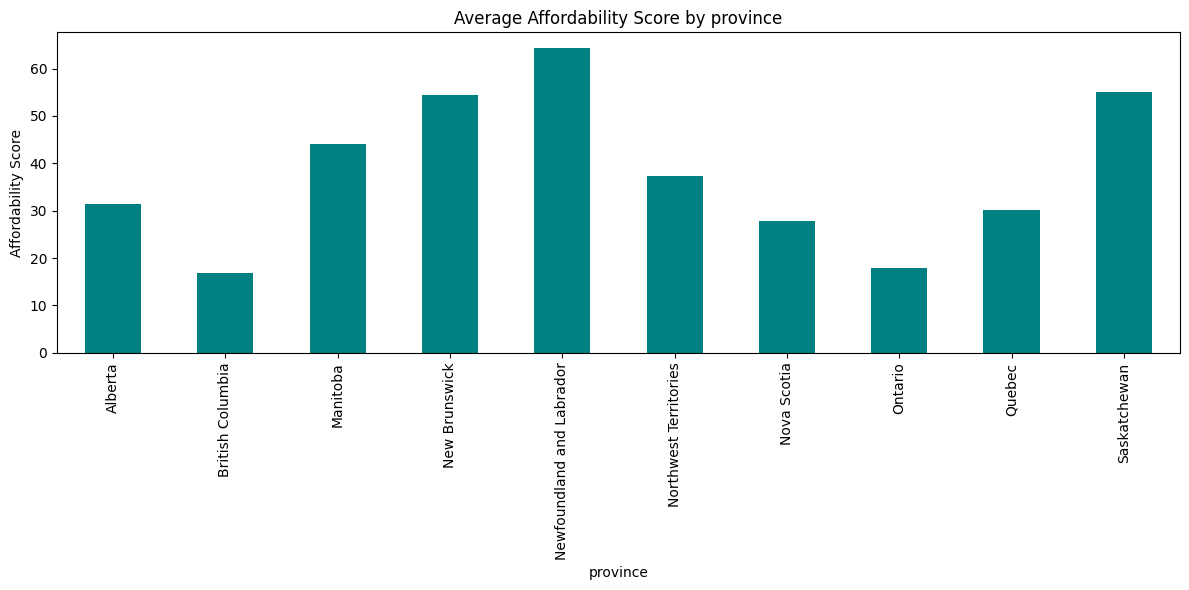

In [70]:
import matplotlib.pyplot as plt

# Plot affordability score by province
provincedata = data.groupby('province')['affordability_score'].mean()
provincedata.to_csv('Average_Affordability_Score_by_province.csv')
provincedata.to_json('Average_Affordability_Score_by_province.json')

s= plt.plot(kind='bar', figsize=(12, 6), color='teal')
provincedata.plot(kind='bar', figsize=(12, 6), color='teal')

plt.title("Average Affordability Score by province")
plt.xlabel("province")
plt.ylabel("Affordability Score")
plt.tight_layout()
plt.savefig('Average_Affordability_Score_by_province.png')

plt.show()

## Average Affordability Score by City

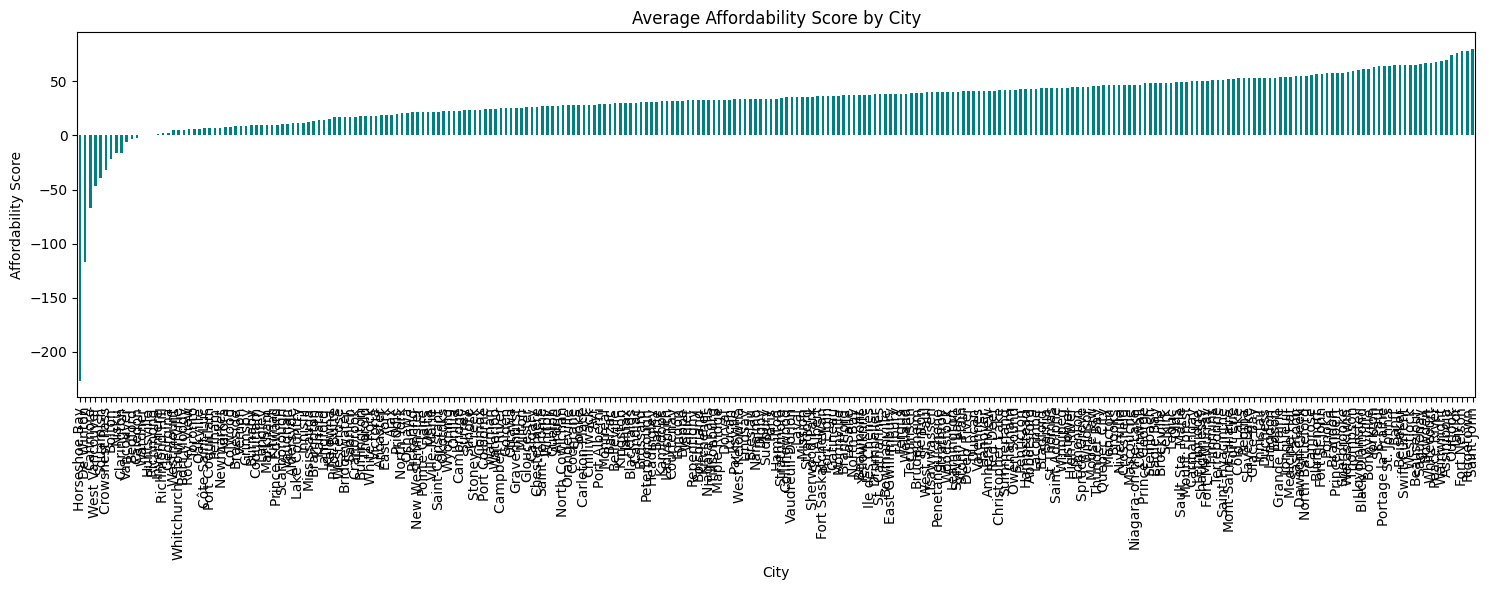

In [72]:
import matplotlib.pyplot as plt

# Plot affordability score by city
df1=data.groupby('city')['affordability_score'].mean().sort_values()
df1.to_csv('Average_Affordability_Score_by_City.csv')
df1.to_json('Average_Affordability_Score_by_City.json')

df1.plot(kind='bar', figsize=(15, 6), color='teal')
plt.title("Average Affordability Score by City")
plt.xlabel("City")
plt.ylabel("Affordability Score")
plt.tight_layout()
plt.savefig('Average_Affordability_Score_by_City.png')

plt.show()

## Average Affordability Score for Selected Cities
Comparing cities: 'Vancouver', 'Toronto','Calgary'

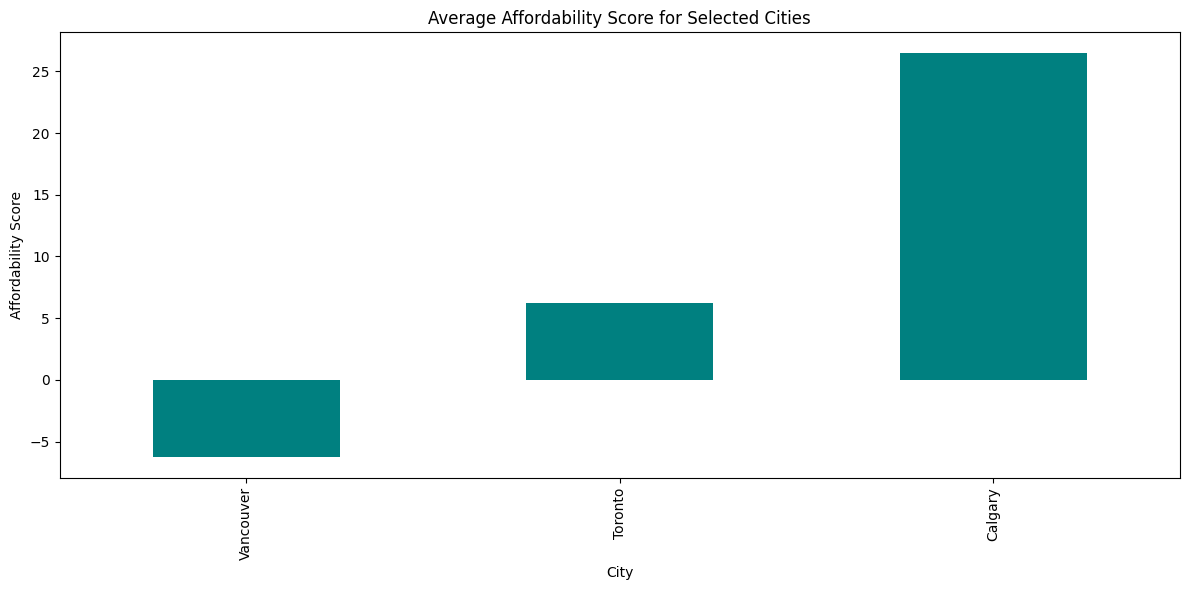

In [73]:
import matplotlib.pyplot as plt

# Filter data for two cities: Vancouver and Toronto
selected_cities = data[data['city'].isin(['Vancouver', 'Toronto','Calgary'])]

# Plot affordability scores for the selected cities
dfs=selected_cities.groupby('city')['affordability_score'].mean().sort_values()
dfs.to_csv('Average_Affordability_Score_for_Selected_Cities.csv')
dfs.to_json('Average_Affordability_Score_for_Selected_Cities.json')

dfs.plot(kind='bar', figsize=(12, 6), color='teal')
plt.title("Average Affordability Score for Selected Cities")
plt.xlabel("City")
plt.ylabel("Affordability Score")
plt.tight_layout()
plt.savefig('Average_Affordability_Score_for_Selected_Cities.png')

plt.show()

In [ ]:
# # Group by count affordability categories and province
# affordability_counts = data.groupby('affordability_category')['province'].value_counts()

# # Reset the index to make it more readable
# affordability_counts = affordability_counts.reset_index(name='count')

# # Display the counts
# print(affordability_counts)
# affordability_counts.to_csv('affordability_categories_count_for_provinces.csv')

## Affordability score categories

In [74]:
# Group by province and affordability category to count occurrences
affordability_counts = data.groupby(['province', 'affordability_category']).size().reset_index(name='count')

# Pivot the table to show hierarchical rows
pivot_table = affordability_counts.pivot_table(
    values='count',
    index='province',
    columns='affordability_category',
    fill_value=0  # Fill missing values with 0
)

# Ensure counts are integers
pivot_table = pivot_table.astype(int)

# Save the table to a CSV file
pivot_table.to_csv('affordability_score_categories.csv')

pivot_table.to_json('affordability_score_categories.json')

print(pivot_table)

affordability_category     Affordable  Manageable  Unaffordable
province                                                       
Alberta                          3097        9510          1170
British Columbia                   70         848           236
Manitoba                          292         584            14
New Brunswick                       6           7             0
Newfoundland and Labrador          12           0             0
Northwest Territories               1          19             0
Nova Scotia                        56         186            39
Ontario                           436        4965          1226
Quebec                            362        1717           190
Saskatchewan                      527         199             2


## Affordability scores count by province

In [75]:
# Group by province and count affordability categories
affordability_counts = data.groupby('province')['affordability_category'].value_counts()

# Reset the index to make it more readable
affordability_counts = affordability_counts.reset_index(name='count')

# Display the counts
affordability_counts.to_csv('affordability_scores_count_by_province.csv')
affordability_counts.to_json('affordability_scores_count_by_province.json')
print(affordability_counts)


                     province affordability_category  count
0                     Alberta             Manageable   9510
1                     Alberta             Affordable   3097
2                     Alberta           Unaffordable   1170
3            British Columbia             Manageable    848
4            British Columbia           Unaffordable    236
5            British Columbia             Affordable     70
6                    Manitoba             Manageable    584
7                    Manitoba             Affordable    292
8                    Manitoba           Unaffordable     14
9               New Brunswick             Manageable      7
10              New Brunswick             Affordable      6
11  Newfoundland and Labrador             Affordable     12
12      Northwest Territories             Manageable     19
13      Northwest Territories             Affordable      1
14                Nova Scotia             Manageable    186
15                Nova Scotia           

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Bar plot for affordability counts
# plt.figure(figsize=(12, 6))
# sns.barplot(data=affordability_counts, x='province', y='count', hue='affordability_category', palette='viridis')
# plt.title('Affordability Category Counts by Province')

# # Add plot details
# plt.title('Affordability Category Counts by Province')
# plt.xlabel('Province')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

## Affordability category count plot by province

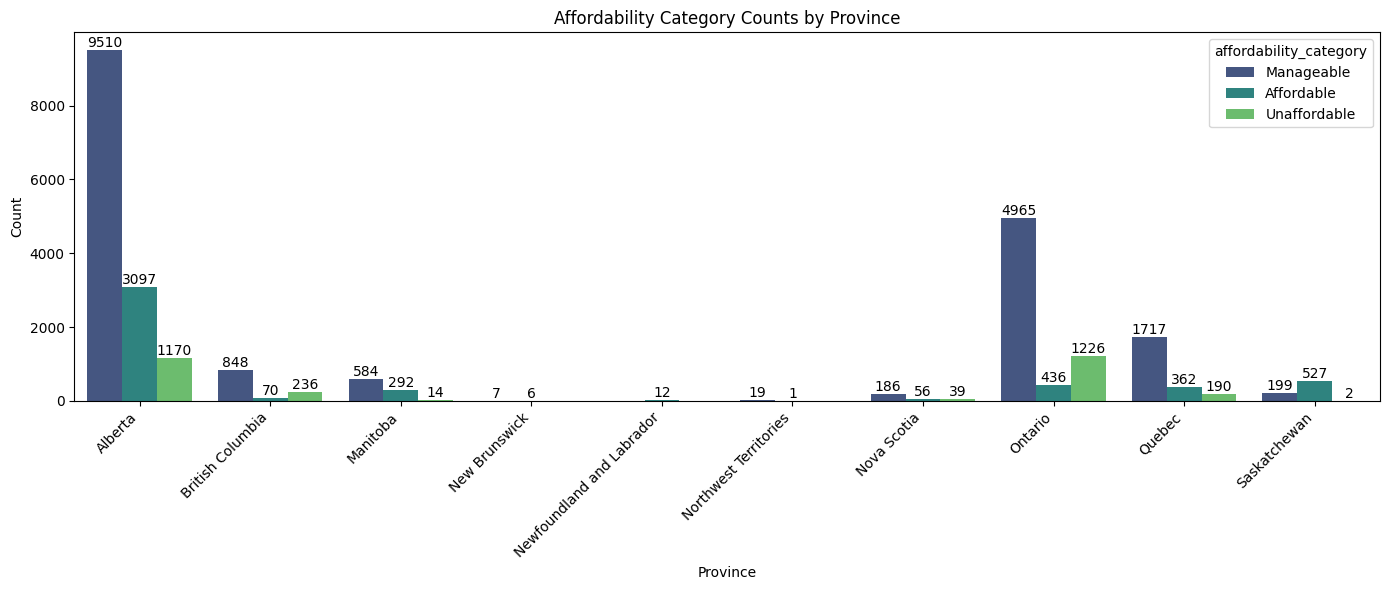

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for affordability counts
plt.figure(figsize=(14, 6))
barplot = sns.barplot(data=affordability_counts, x='province', y='count', hue='affordability_category', palette='viridis')
plt.title('Affordability Category Counts by Province')

# Annotate each bar with its value
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge')

# Add plot details
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('affordability_category_count_by_province.png')
plt.show()

In [ ]:
# print(df[df['province'] == 'Alberta'].sort_values(by='price', ascending=False).head())

## Rent Trends by Province

In [77]:
# Check to ensure 'price' is numeric

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df[df['price'] > 0]
df = df.dropna(subset=['province', 'price'])


# Group by province to calculate trends
trend_data = df.groupby('province').agg(
    max_rent=('price', 'max'),
    min_rent=('price', 'min'),
    median_rent=('price', 'median'),
    mean_rent=('price', 'mean')
    # std_dev_rent=('price', 'std')  # Standard deviation
).reset_index()

trend_data.to_csv('Rent_trends_by_Province.csv', index=False)
trend_data.to_json('Rent_trends_by_Province.json')
print(trend_data)


                    province  max_rent  min_rent  median_rent    mean_rent
0                    Alberta   29990.0       1.0      1948.00  2061.168642
1           British Columbia    9995.0     250.0      2327.50  2523.546772
2                   Manitoba   18955.0     477.0      1692.00  1721.259815
3              New Brunswick    2230.0     609.0      1572.50  1479.333333
4  Newfoundland and Labrador    1365.0     850.0      1020.00  1067.083333
5      Northwest Territories    2775.0    1350.0      1750.00  1877.500000
6                Nova Scotia    7500.0     569.0      2245.00  2402.012925
7                    Ontario   19170.0     425.0      2378.48  2511.099882
8                     Quebec    8500.0       1.0      1987.50  2104.119757
9               Saskatchewan    4500.0     640.0      1299.00  1348.745879


In [ ]:
# df.columns

## Maximum and Minimum rent records by province

In [78]:

max_records = df.loc[df.groupby('province')['price'].idxmax()] #Max rent by Province
min_records = df.loc[df.groupby('province')['price'].idxmin()] #Min rent by Province

columns_to_show = ['province','price','type','sq_feet','beds', 'baths','furnishing','lease_term', 'latitude', 'longitude']  # Adjust this list as needed

# Display detailed records
print("Details of Maximum Rent Records:")
print(max_records[columns_to_show])

print("\nDetails of Minimum Rent Records:")
print(min_records[columns_to_show])

import csv
max_records.to_csv('max_records.csv', index=False)
min_records.to_csv('min_records.csv', index=False)
min_records.to_json('min_records.json')
max_records.to_json('max_records.json')


Details of Maximum Rent Records:
                        province    price       type sq_feet    beds baths  \
4586                     Alberta  29990.0      House     NaN  3 Beds     2   
9199            British Columbia   9995.0      House    3773  4 Beds     3   
15179                   Manitoba  18955.0  Apartment     885  2 Beds     2   
15822              New Brunswick   2230.0  Apartment    1433  2 Beds     2   
15835  Newfoundland and Labrador   1365.0  Apartment     325  2 Beds     1   
16145      Northwest Territories   2775.0  Apartment       0  4 Beds   1.5   
16012                Nova Scotia   7500.0  Apartment    1955  2 Beds   2.5   
21742                    Ontario  19170.0  Apartment     NaN  3 Beds     2   
23262                     Quebec   8500.0  Apartment    2000  3 Beds   2.5   
25524               Saskatchewan   4500.0      House       0  4 Beds   3.5   

        furnishing  lease_term   latitude   longitude  
4586     Furnished  Short Term  51.064172 -114.04967

## Rent trends by City

In [80]:
# Ensure 'price' column is numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['city', 'price'])

# Group by province and calculate various rent trends
trend_data = df.groupby('city').agg(
    max_rent=('price', 'max'),
    min_rent=('price', 'min'),
    median_rent=('price', 'median'),
    mean_rent=('price', 'mean'),
    # std_dev_rent=('price', 'std')  # Standard deviation
).reset_index()

import csv
# Save to CSV
trend_data.to_csv('Rent_trends_by_City.csv', index=False)
trend_data.to_json('Rent_trends_by_City.json')

# import json
# pd.read_csv('Rent_trends_by_City.csv').to_json('Rent_trends_by_City.json')

print(trend_data)


            city  max_rent  min_rent  median_rent    mean_rent
0     Abbotsford    3030.0    1200.0     1675.000  1701.302326
1        Airdrie    5500.0     600.0     2099.500  2170.373134
2           Ajax    3545.0    1645.0     2409.125  2428.360625
3      Aldersyde    3050.0    1950.0     3000.000  2666.666667
4    Amherstview    1895.0    1695.0     1695.000  1761.666667
..           ...       ...       ...          ...          ...
264     Winnipeg   18955.0     477.0     1692.000  1737.036991
265    Woodstock    2490.0    1475.0     1865.000  1796.375000
266      Wyoming    2695.0    1895.0     2495.000  2325.000000
267  Yellowknife    2775.0    1350.0     1750.000  1877.500000
268      Yorkton    1450.0     830.0     1085.000  1088.255814

[269 rows x 5 columns]


In [ ]:
# import json
# pd.read_csv('Rent_trends_by_City.csv').to_json('Rent_trends_by_City.json')

## Average Rent by Province

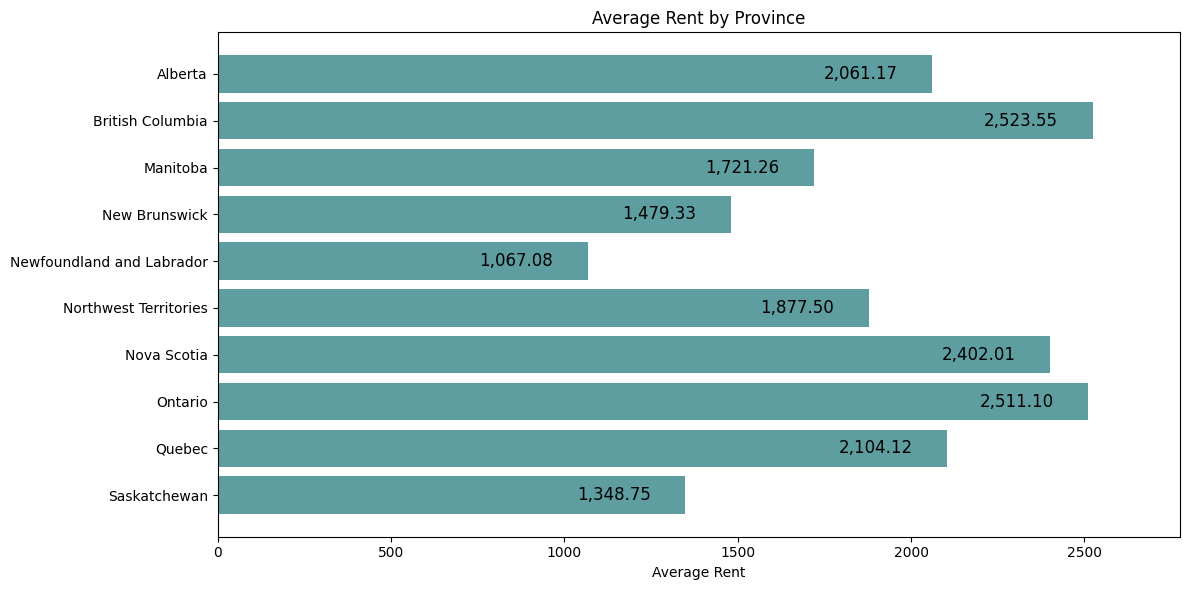

In [81]:
import matplotlib.pyplot as plt

# Group by province and calculate average rent
trend_data = df.groupby('province')['price'].mean().reset_index()

trend_data.to_csv('Average_rent_by_province.csv', index=False)
trend_data.to_json('Average_rent_by_province.json')

trend_data.rename(columns={'price': 'average_rent'}, inplace=True)

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.barh(trend_data['province'], trend_data['average_rent'], color='cadetblue')

# Add detailed numbers (annotation) on bars
for bar in bars:
    plt.text(
        bar.get_width() - 100,  # Negative offset
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():,.2f}",
        va='center',
        ha='right',
        color='black',
        fontsize=12
    )

# Adjust x-axis limits to add padding
plt.xlim(0, trend_data['average_rent'].max() * 1.1)  # Add 10% padding to the max value


plt.xlabel('Average Rent')
plt.title('Average Rent by Province')
plt.gca().invert_yaxis()  # Ensure the highest value is on top
plt.tight_layout()

# Save and show the plot
plt.savefig('Average_rent_by_province.png')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt


# #Group by province and calculate average rent
# trend_data = df.groupby('province')['price'].mean().reset_index()
# trend_data.rename(columns={'price': 'average_rent'}, inplace=True)
# # print(trend_data)

# plt.figure(figsize=(10, 6))
# plt.barh(trend_data['province'], trend_data['average_rent'], color='skyblue')
# plt.xlabel('Average Rent')
# plt.title('Average Rent by Province')
# plt.gca().invert_yaxis()
# # Highest on top plt.tight_layout()
# plt.savefig('province_rent_avg_plot.png')
# plt.show()

## Maximum rent by province

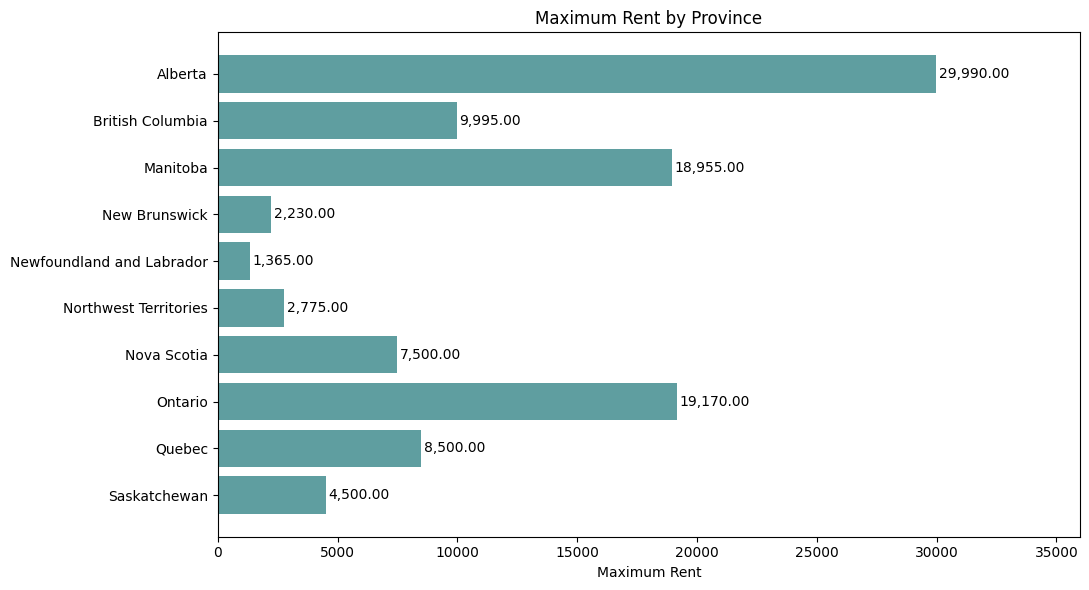

In [83]:
# Ensure 'price' column is numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['province', 'price'])

# Group by province and calculate various rent trends
trend_data = df.groupby('province').agg(
    max_rent=('price', 'max'),
    min_rent=('price', 'min'),
    median_rent=('price', 'median'),
    mean_rent=('price', 'mean'),
    #std_dev_rent=('price', 'std')  # Standard deviation
).reset_index()


trend_data.to_csv('Maximum_Rent_by_Province.csv', index=False)
trend_data.to_json('Maximum_Rent_by_Province.json')

# Create the plot
plt.figure(figsize=(11, 6))

bars = plt.barh(trend_data['province'], trend_data['max_rent'], color='cadetblue')

# Add detailed numbers (annotation) on bars
for bar in bars:
    plt.text(
        bar.get_width() + 100,  # Offset text to place it outside the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically
        f"{bar.get_width():,.2f}",
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )

# Adjust x-axis limits to add padding
plt.xlim(0, trend_data['max_rent'].max() * 1.2)  # Add 20% padding to the max value

plt.xlabel('Maximum Rent')
plt.title('Maximum Rent by Province')
plt.gca().invert_yaxis()  # Highest on top

plt.tight_layout()
plt.savefig('Maximum_Rent_by_Province.png')
# plt.close()

# Saving to Csv,Json,Zip


In [ ]:
# files.download('preprocessed_data.csv')  #download preproccessed dataset

In [ ]:
# import csv
# # Save to CSV
# trend_data.to_csv('Rent_trends_by_Province.csv', index=False)

In [84]:
!zip Trends.zip \
geospatial_distribution.png \
Ave_Price_Per_Sq_Foot_by_City_in_BC.csv\
Ave_Price_Per_Sq_Foot_by_City_in_BC.json\
Ave_Price_Per_Sq_Foot_by_City_in_BC.png\
Rent_trends_by_City_in_each_Province.json\
Rent_trends_by_City_in_each_Province.csv\
affordability_score_categories.csv\
affordability_score_categories.json\
Average_Affordability_Score_by_province.csv\
Average_Affordability_Score_by_province.json\
Average_Affordability_Score_by_province.png\
Average_Affordability_Score_by_City.csv\
Average_Affordability_Score_by_City.json\
Average_Affordability_Score_by_City.png\
Average_Affordability_Score_for_Selected_Cities.csv\
Average_Affordability_Score_for_Selected_Cities.json\
Average_Affordability_Score_for_Selected_Cities.png\
affordability_score_categories.csv\
affordability_score_categories.json\
affordability_scores_count_by_province.csv\
affordability_scores_count_by_province.json\
affordability_category_count_by_province.png\
Rent_trends_by_Province.csv\
Rent_trends_by_Province.json\
Rent_trends_by_Province.png\
min_records.csv \
min_records.json\
max_records.csv\
max_records.json\
Rent_trends_by_City.csv\
Rent_trends_by_City.json\
Average_rent_by_province.csv\
Average_rent_by_province.json\
Average_rent_by_province.png\
Maximum_Rent_by_Province.csv\
Maximum_Rent_by_Province.json\
Maximum_Rent_by_Province.png\




	zip warning: name not matched: Rent_trends_by_Province.png
  adding: geospatial_distribution.png (deflated 4%)
  adding: Ave_Price_Per_Sq_Foot_by_City_in_BC.csv (deflated 48%)
  adding: Ave_Price_Per_Sq_Foot_by_City_in_BC.json (deflated 39%)
  adding: Ave_Price_Per_Sq_Foot_by_City_in_BC.png (deflated 13%)
  adding: Rent_trends_by_City_in_each_Province.json (deflated 66%)
  adding: Rent_trends_by_City_in_each_Province.csv (deflated 63%)
  adding: affordability_score_categories.csv (deflated 25%)
  adding: affordability_score_categories.json (deflated 59%)
  adding: Average_Affordability_Score_by_province.csv (deflated 28%)
  adding: Average_Affordability_Score_by_province.json (deflated 25%)
  adding: Average_Affordability_Score_by_province.png (deflated 19%)
  adding: Average_Affordability_Score_by_City.csv (deflated 53%)
  adding: Average_Affordability_Score_by_City.json (deflated 53%)
  adding: Average_Affordability_Score_by_City.png (deflated 11%)
  adding: Average_Affordability_Sc

In [57]:
#!zip Trends.zip city_data.csv Average_Affordability_Score_by_province.png Average_Affordability_Score_by_City.png Average_Affordability_Score_for_Selected_Cities.png affordability_score_categories.csv affordability_scores_count_by_province.csv affordability_category_count_by_province.png Rent_trends_by_Province.csv Average_rent_by_province.png Maximum_Rent_by_Province.png max_records.csv Average_rent_by_province.png Rent_trends_by_City.csv Rent_trends_by_City_in_each_Province.csv min_records.csv geospatial_distribution.png Ave_Price_Per_Sq_Foot_by_City_in_BC.png affordability_score_categories.csv

In [86]:
from google.colab import files
# files.download('Trends.zip')
# files.download('Average_price_per_sqft_by_city_for_all_provinces_data.zip')
# files.download('heatmap_data.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>